<a href="https://colab.research.google.com/github/lisagirard/Psychedelics/blob/main/CapstoneII_Psychedelics_Use_LisaGirard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Psychedelic mushrooms in the USA: Knowledge, patterns of use, and association with health outcomes**
(habits of current users)

https://datadryad.org/stash/dataset/doi:10.5061/dryad.bzkh189b6

https://www.medrxiv.org/content/10.1101/2021.09.20.21263824v1

https://www.frontiersin.org/articles/10.3389/fpsyt.2021.780696/full

Sept 22, 2021
Dec 17, 2021
Jan, 2022 (Frontiers in Psychiatry)

https://orthotoolkit.com/vr-12/ Veterans RAND12 - MCS score

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

import warnings
from scipy import stats
import statistics
from scipy.stats import pearsonr
from scipy.stats.mstats import winsorize
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import statistics
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats.mstats import winsorize
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
#pd.read_csv('data.csv')  
all_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Psychedelics/PsychMushrooms-AHRI-2021-data.csv")
all_data.head()


,CASEID_7139,COHORTS,PYS_USE_VENN,PSY_USE_YN,PM_USE_YN,PM_USE_ONLY_YN,PM_VS_PSY_YN,SEX,AGE,ETHNICITY,...,PSY2_UNDIAG_CONCERN,PSY2_NO_KNOWLEDGE,PM1_GEN_HEALTH,PM1_DIAG_CONDITION,PM1_UNDIAG_CONCERN,PM2_FREQ_COVID,PM3_FREQ_POLITICS,PM4_CARE,INSURANCE,DATA_WEIGHT
0,1,1,1,1,1,1,2,0,19,3,...,0,0,1,0,0,2,3,0,0,57772.54
1,2,1,1,1,1,1,2,0,21,2,...,1,0,1,0,0,3,3,0,1,25738.42
2,3,1,1,1,1,1,2,0,22,2,...,1,0,0,0,0,3,4,0,0,42172.56
3,4,1,1,1,1,1,2,0,22,2,...,0,0,1,0,0,3,3,0,1,28356.81
4,5,1,1,1,1,1,2,0,23,2,...,1,0,1,0,0,3,3,0,1,25738.42


<font color = ' red'>**OBJECTIVE: <br>Can a set of Mental Health (MH) pre-existing conditions  and/or comoribidities 'predict' a psychedelics user? <br>Do these MH conditions lead to psychedelics use?** </font>

* Consider features that are pre-existing conditions related to mental health issues and generalized testing scores related to MH conditions
* Conditions to consider: 
  * depression
  * anxiety
  * chronic pain
  * migraines
  * insomnia
  * gastric issues
  * high scores for GAD testing
  * high scores for PHQ testing
  * low scores of MCS12 testing
  * CCI score (comorbidity imminent death indexing)
* checking for correlation between them and the target  - " have used psychedelics"

In [ ]:
all_data.shape

(7139, 57)

In [ ]:
all_data['PM_USE_ONLY_YN'].sum()

122

<font color = 'red'> WOW - ONLY 122 MUSHROOM USERS </font> <br>
<font color = 'blue'> I WENT BACK AND DISCOVERD THIS AFTER SEEING VERY LOW RESULTS ON PREDICITONS, PLOTS AND COUNTS ETC...</font>



---

<font color = 'blue'> SO AT THIS POINT I WOULD CONSIDER OPENING THE PREDICITON TO **ANY PSYCHEDELIC USE** - BECAUSE THERE ARE NOT A LOT OF ONLY-MUSHROOM USERS TO CONSIDER WORKING WITH/TRAINING ON</font>

In [ ]:
all_data['PSY_USE_YN'].sum()

526

THAT'S AN IMPROVEMENT AT LEAST - this is 7% of entire data set/population

## FEATURES DESCRIPTIONS
PM = Pyschedelic Mushroom

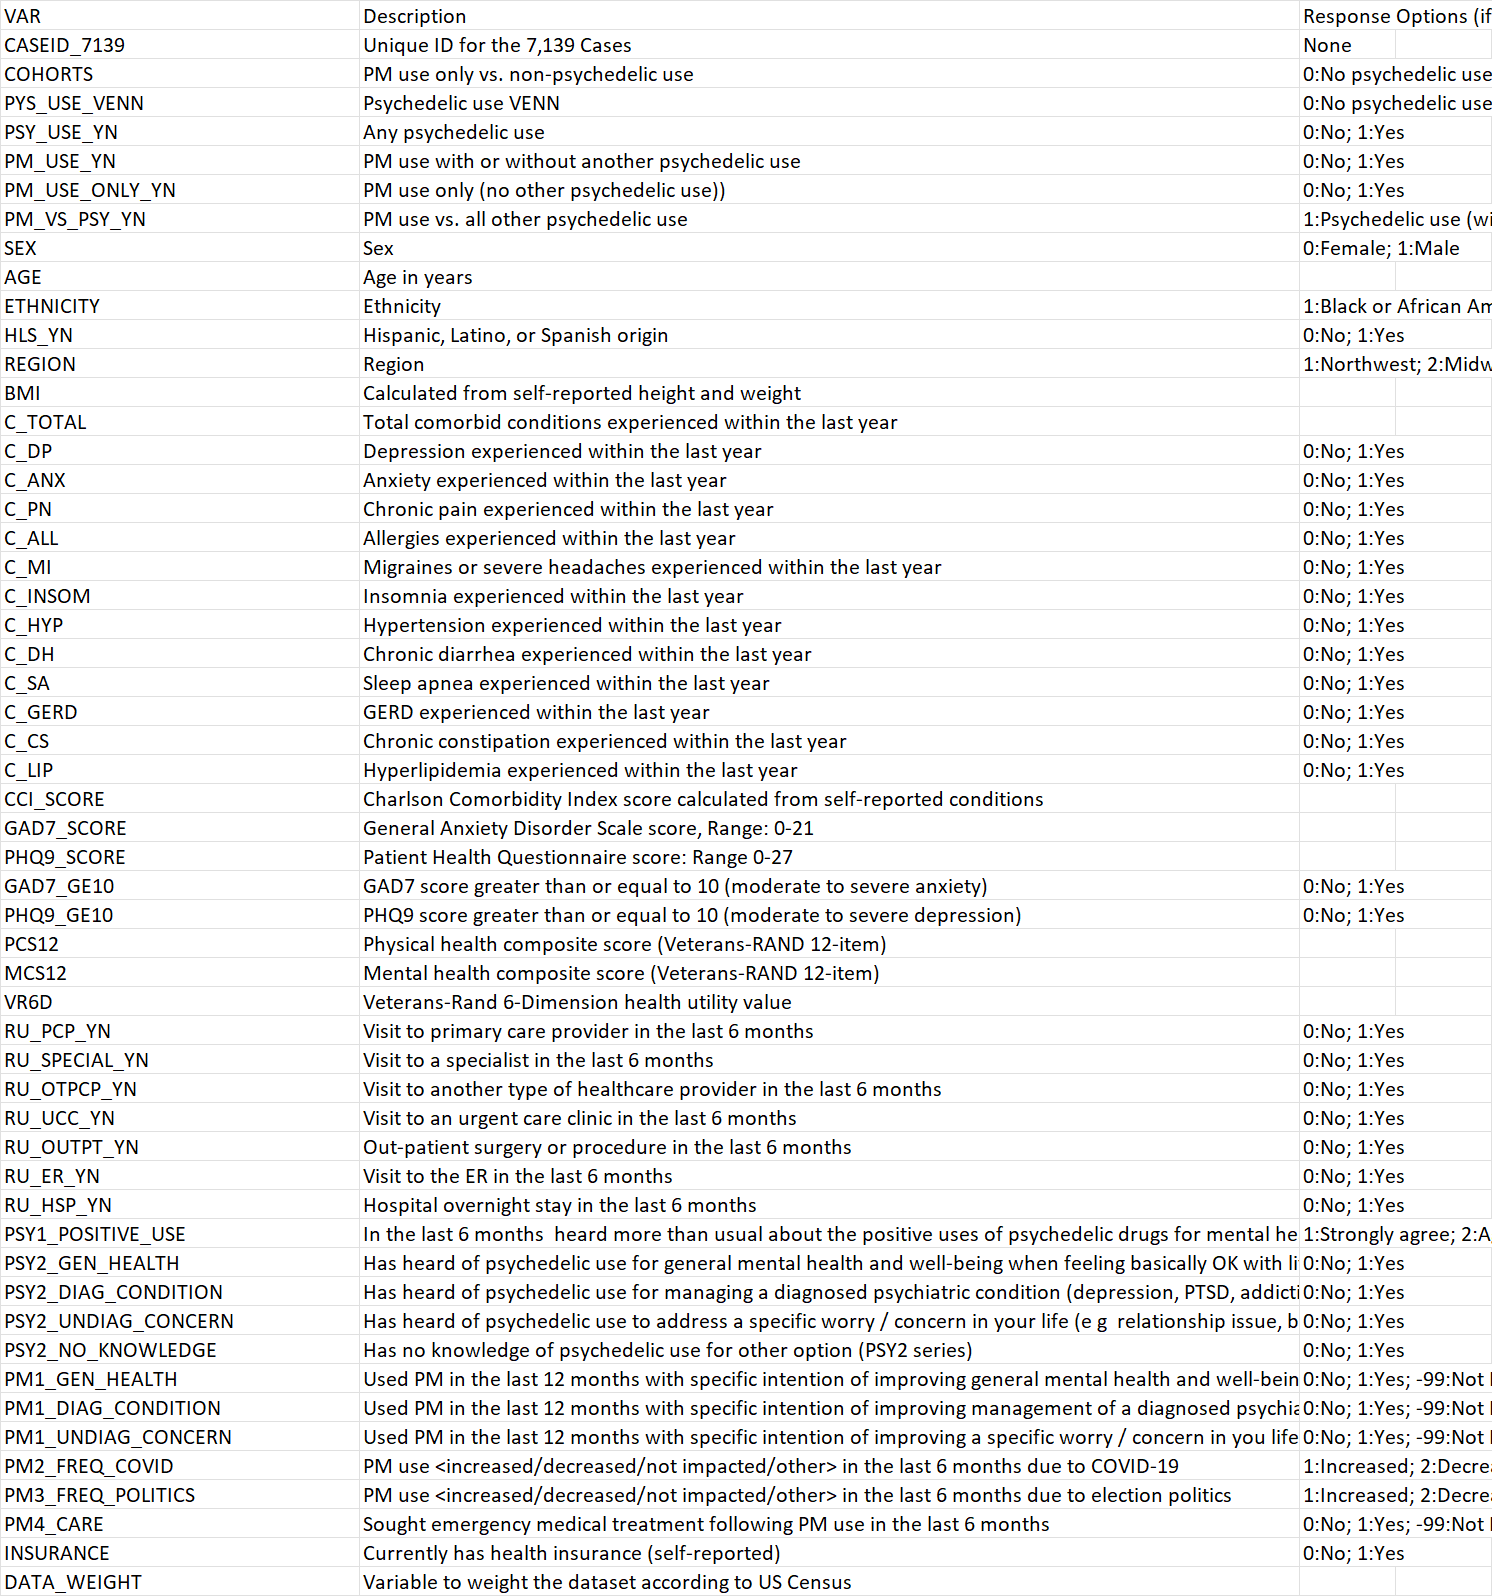

**QUESTIONS TO CONSIDER**

Behavior descriptives of "regular, recreational PM users"
1.   Does PM use increase mental health stability? (can't tell bc no post-use data)
2.   Does PM use increase physical health? (can't tell - no post-use data)
3.  Were more people using PM during covid than not during covid? (don't have post/pre covid data, just "during covid)
4.  Did election stress contribute to more PM use?
5. Are folks with mental health issues more likely to use PM?
6. Do folks with higher MH instability have better results for MH stability with PM use? (dont have post use-data)
7. Do pre-existing conditions lead to PM use (ie Anxiety, depression)?
8. Are chronically ill people (or those with lots of other DX's) more likely to use PM? (create a set of features that indicate chronically ill) - Are PM users overweight, depressed, and low MH scores ? </font>
9. **Is there one or a few pre-exisiting conditions that tend to lead users to PMs? Do PM users have the same pre-existing conditions?**
10. Do PM users have more anxiety, depression, and/or other DXs?
11. <font color = ' red'>**Can a set of conditions/comorbidity/pre-existing conditions/MH score 'predict' a PM user?** </font>




---



---



**FEATURE SET TO CONSIDER:**
* PYS_USE_VENN
* PM_USE_ONLY_YN
* SEX
* AGE
* ETHNICITY
* HLS_YN
* BMI
* C_TOTAL
* C_DP
* C_ANX
* C_PN
* C_ALL
* C_MI
* C_INSOM
* C_HYP
* C_DH
* C_SA
* C_GERD
* C_CS
* C_LIP
* CCI_SCORE
* GAD7_SCORE
* PHQ9_SCORE
* GAD7_GE10
* PHQ9_GE10

MAYBES:
* PCS12
* MCS12
* VR6D
* RU-PCP-YN
* RU-SPECIAL-YN
* RU-OTPCP-YN
* RU-UCC-YN
* RU-OUTPT-YN
* RU-ER-YN
* RU-HSP-YN
* PSY1_POSITIVES_USE


In [ ]:
all_data.isna().sum()

CASEID_7139            0
COHORTS                0
PYS_USE_VENN           0
PSY_USE_YN             0
PM_USE_YN              0
PM_USE_ONLY_YN         0
PM_VS_PSY_YN           0
SEX                    0
AGE                    0
ETHNICITY              0
HLS_YN                 0
REGION                 0
ED                     0
EMPL                   0
INCOME                 0
BMI                    0
C_TOTAL                0
C_DP                   0
C_ANX                  0
C_PN                   0
C_ALL                  0
C_MI                   0
C_INSOM                0
C_HYP                  0
C_DH                   0
C_SA                   0
C_GERD                 0
C_CS                   0
C_LIP                  0
CCI_SCORE              0
GAD7_SCORE             0
PHQ9_SCORE             0
GAD7_GE10              0
PHQ9_GE10              0
PCS12                  0
MCS12                  0
VR6D                   0
RU_PCP_YN              0
RU_SPECIAL_YN          0
RU_OTPCP_YN            0


In [ ]:
all_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7139 entries, 0 to 7138
Data columns (total 57 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CASEID_7139          7139 non-null   int64  
 1   COHORTS              7139 non-null   int64  
 2   PYS_USE_VENN         7139 non-null   int64  
 3   PSY_USE_YN           7139 non-null   int64  
 4   PM_USE_YN            7139 non-null   int64  
 5   PM_USE_ONLY_YN       7139 non-null   int64  
 6   PM_VS_PSY_YN         7139 non-null   int64  
 7   SEX                  7139 non-null   int64  
 8   AGE                  7139 non-null   int64  
 9   ETHNICITY            7139 non-null   int64  
 10  HLS_YN               7139 non-null   int64  
 11  REGION               7139 non-null   int64  
 12  ED                   7139 non-null   int64  
 13  EMPL                 7139 non-null   int64  
 14  INCOME               7139 non-null   int64  
 15  BMI                  7139 non-null   f

<font color='blue'>**NO NULLS, ALL DATA IS INT OR FLOAT (NO OBJECTS TO ENCODE)**</font>

In [ ]:
# CREATING DATASET OF CONDITIONS,SCORES AND TARGETED TO 'JUST MUSHROOM USERS'
mush_preEx = all_data[['PM_USE_ONLY_YN','BMI','C_TOTAL','CCI_SCORE','C_DP','C_ANX','C_PN','C_ALL','C_MI',
                           'C_INSOM','C_HYP','C_DH','C_SA','C_GERD','C_CS','C_LIP','GAD7_SCORE','PHQ9_SCORE',
                           'GAD7_GE10','PHQ9_GE10']] #dropped sex, age, ethnicity, HLS
mush_preEx.rename(columns = {'PM_USE_ONLY_YN':'MUSH_ONLY'}, inplace = True)
mush_preEx

,MUSH_ONLY,BMI,C_TOTAL,CCI_SCORE,C_DP,C_ANX,C_PN,C_ALL,C_MI,C_INSOM,C_HYP,C_DH,C_SA,C_GERD,C_CS,C_LIP,GAD7_SCORE,PHQ9_SCORE,GAD7_GE10,PHQ9_GE10
0,1,27.41,3,0,0,1,0,0,1,0,0,0,0,0,0,0,3,8,0,0
1,1,29.26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,20.60,9,0,1,1,1,1,0,0,0,0,0,1,0,0,21,17,1,1
3,1,18.56,2,0,1,1,0,0,0,0,0,0,0,0,0,0,5,15,0,1
4,1,36.80,4,0,1,1,0,1,1,0,0,0,0,0,0,0,13,15,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7134,0,22.47,3,0,0,1,0,0,0,0,0,1,0,0,0,0,14,11,1,1
7135,0,40.24,4,0,0,0,1,0,0,1,1,0,0,0,0,0,4,4,0,0
7136,0,22.71,3,0,0,0,0,1,0,0,0,0,0,0,0,0,3,3,0,0
7137,0,17.50,1,3,0,0,0,0,1,0,0,0,0,0,0,0,2,4,0,0


**CREATING NEW DATAFRAME FOR ALL PSYCHEDELICS, NOT JUST MUSHROOMS**

In [ ]:
# psych_preEx = Psychedelics use with pre-existing conditions
psych_preEx = all_data[['PSY_USE_YN','BMI','PSY1_POSITIVE_USE','C_TOTAL','CCI_SCORE', 'MCS12','C_DP','C_ANX','C_PN','C_ALL','C_MI',
                           'C_INSOM','C_HYP','C_DH','C_SA','C_GERD','C_CS','C_LIP','GAD7_SCORE','PHQ9_SCORE',
                           'GAD7_GE10','PHQ9_GE10','RU_OTPCP_YN']] #dropped sex, age, ethnicity, HLS
#psych_preEx.rename(columns = {'PSY_USE_YN':'ALL_PSYCHS'}, inplace = True)
psych_preEx.rename(columns = {'PSY1_POSITIVE_USE':'KNOWLEDGE'}, inplace = True)
psych_preEx

,PSY_USE_YN,BMI,KNOWLEDGE,C_TOTAL,CCI_SCORE,MCS12,C_DP,C_ANX,C_PN,C_ALL,...,C_DH,C_SA,C_GERD,C_CS,C_LIP,GAD7_SCORE,PHQ9_SCORE,GAD7_GE10,PHQ9_GE10,RU_OTPCP_YN
0,1,27.41,3,3,0,37.90,0,1,0,0,...,0,0,0,0,0,3,8,0,0,0
1,1,29.26,1,0,0,57.93,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,20.60,3,9,0,25.91,1,1,1,1,...,0,0,1,0,0,21,17,1,1,0
3,1,18.56,2,2,0,25.13,1,1,0,0,...,0,0,0,0,0,5,15,0,1,0
4,1,36.80,2,4,0,45.53,1,1,0,1,...,0,0,0,0,0,13,15,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7134,1,22.47,1,3,0,46.86,0,1,0,0,...,1,0,0,0,0,14,11,1,1,0
7135,1,40.24,3,4,0,38.54,0,0,1,0,...,0,0,0,0,0,4,4,0,0,0
7136,1,22.71,2,3,0,51.77,0,0,0,1,...,0,0,0,0,0,3,3,0,0,0
7137,1,17.50,1,1,3,42.35,0,0,0,0,...,0,0,0,0,0,2,4,0,0,1


In [ ]:
psych_conds = psych_preEx.copy()
# psych_conds

**Charlson Comorbidity Index** - how likely is someone to die with multiple conditions/diagnoses - within one year of hospitalization for such

"The Charlson Comorbidity Index was first developed in 1987 by Mary Charlson and colleagues as a weighted index to predict risk of death within 1 year of hospitalization for patients with specific comorbid conditions. Nineteen conditions were included in the index." 

https://www.mdcalc.com/calc/3917/charlson-comorbidity-index-cci



<font color='blue'> WOULD A HIGHER CCI SCORE LEAD TOWARDS USING PSYCHEDELICS BECAUSE OF AN EXISTENTIAL DREAD OF DYING? </FONT>

There is already medical research, documentation, books, and movies out there about people using psyschedelics to deal with cancer diagnoses. 
SOURCES:
* https://pubmed.ncbi.nlm.nih.gov/30102082/
* https://www.webmd.com/mental-health/story/psychedelic-psilocybin-study-depression
* https://www.washingtonpost.com/health/2022/04/02/cancer-psychedelics-psilocybin-anxiety-depression/
* https://www.scientificamerican.com/article/two-cancer-patients-battle-to-make-psilocybin-accessible-for-palliative-care/
* [DOSED 2 movie](https://www.dosedmovie.com/dosed2/)
* [How to Change Your Mind book](https://a.co/d/8fs31qr)
* [How to Change Your Mind Netflix episodes](https://www.netflix.com/title/80229847)

In [ ]:
psych_preEx.describe()

,PSY_USE_YN,BMI,KNOWLEDGE,C_TOTAL,CCI_SCORE,MCS12,C_DP,C_ANX,C_PN,C_ALL,...,C_DH,C_SA,C_GERD,C_CS,C_LIP,GAD7_SCORE,PHQ9_SCORE,GAD7_GE10,PHQ9_GE10,RU_OTPCP_YN
count,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,...,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000
mean,0.073680,28.024893,3.432974,4.095532,0.462670,44.702105,0.310828,0.355372,0.445721,0.292898,...,0.144278,0.080684,0.133492,0.136854,0.140916,6.333800,7.330438,0.281552,0.330999,0.208853
std,0.261267,7.254711,1.253445,3.639677,1.002994,12.539438,0.462865,0.478659,0.497080,0.455124,...,0.351396,0.272368,0.340130,0.343717,0.347959,5.894224,6.994088,0.449788,0.470606,0.406517
min,0.000000,11.160000,1.000000,0.000000,0.000000,0.690000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,23.050000,3.000000,1.000000,0.000000,36.535000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,26.580000,3.000000,3.000000,0.000000,45.510000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000
75%,0.000000,31.415000,5.000000,6.000000,0.000000,54.980000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,12.000000,1.000000,1.000000,0.000000
max,1.000000,73.120000,5.000000,28.000000,9.000000,72.670000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,27.000000,1.000000,1.000000,1.000000


<a id="outliers"></a>
### OUTLIERS 

**CHECKING FOR OUTLIERS ON psych_preEx**

continuous vars:
* BMI (11 to 73)
* C_TOTAL (0 to 28)
* CCI_SCORE (0 to 9) ** will scale this
* MCS12 (0.69 to 72)
* KNOWLEDGE (0 TO 5) ** will scale this

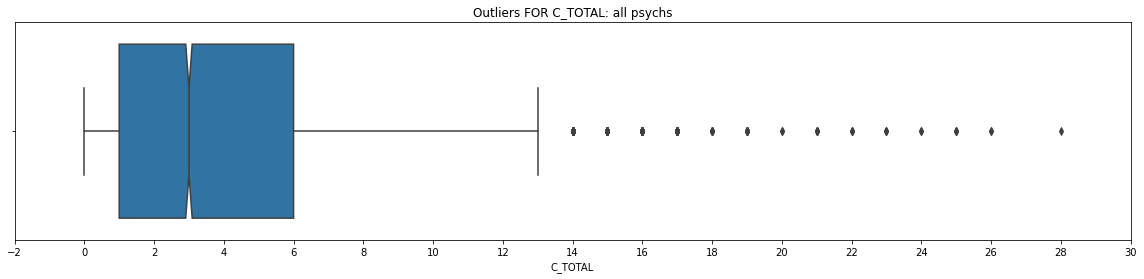

In [ ]:
#chekcing for outliers with boxplot for C_TOTAL
fig = plt.figure() 
fig.set_size_inches(20,4)
sns.boxplot(x = psych_preEx['C_TOTAL'], notch=True)
plt.title("Outliers FOR C_TOTAL: all psychs")
plt.xlim(-2, 30)
plt.locator_params(axis='x', nbins=20)
plt.show()

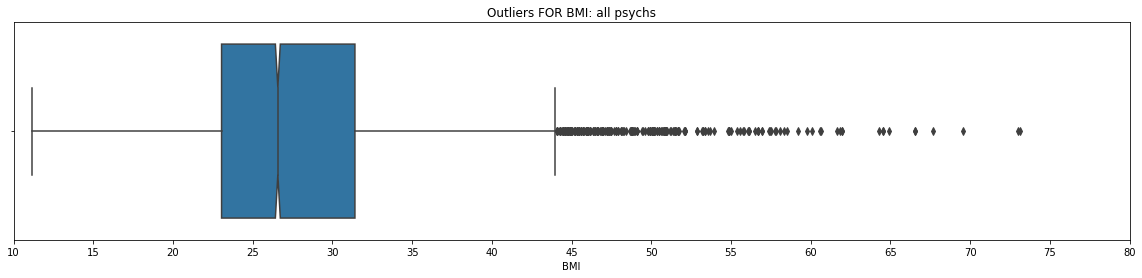

In [ ]:
#chekcing for outliers with boxplot for BMI
fig = plt.figure() 
fig.set_size_inches(20,4)
sns.boxplot(x = psych_preEx['BMI'], notch=True)
plt.title("Outliers FOR BMI: all psychs")
plt.xlim(10,80)
plt.locator_params(axis='x', nbins=20)
plt.show()

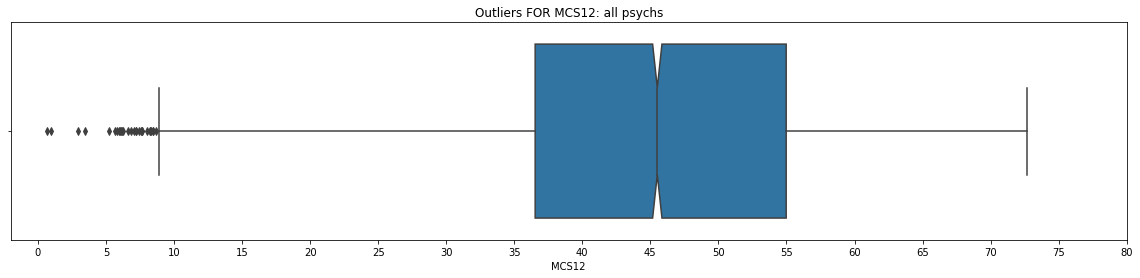

In [ ]:
#chekcing for outliers with boxplot for MCS12
fig = plt.figure() 
fig.set_size_inches(20,4)
sns.boxplot(x = psych_preEx['MCS12'], notch=True)
plt.title("Outliers FOR MCS12: all psychs")
plt.xlim(-2,80)
plt.locator_params(axis='x', nbins=20)
plt.show()

A lot of BMI outliers, a few C_TOTAL outliers, a few MCS12 outliers

**PLOTTING OUTLIERS FOR C_TOTAL, MCS12, AND BMI COMPARED TO USERS AND NON-PSYCH-USERS**

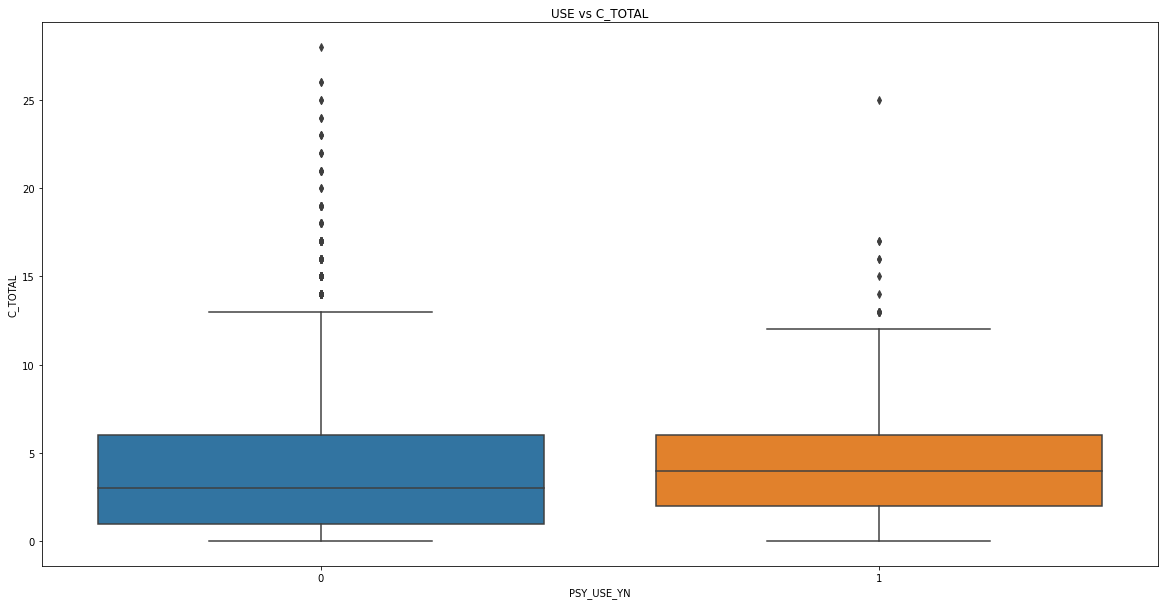

---------------------


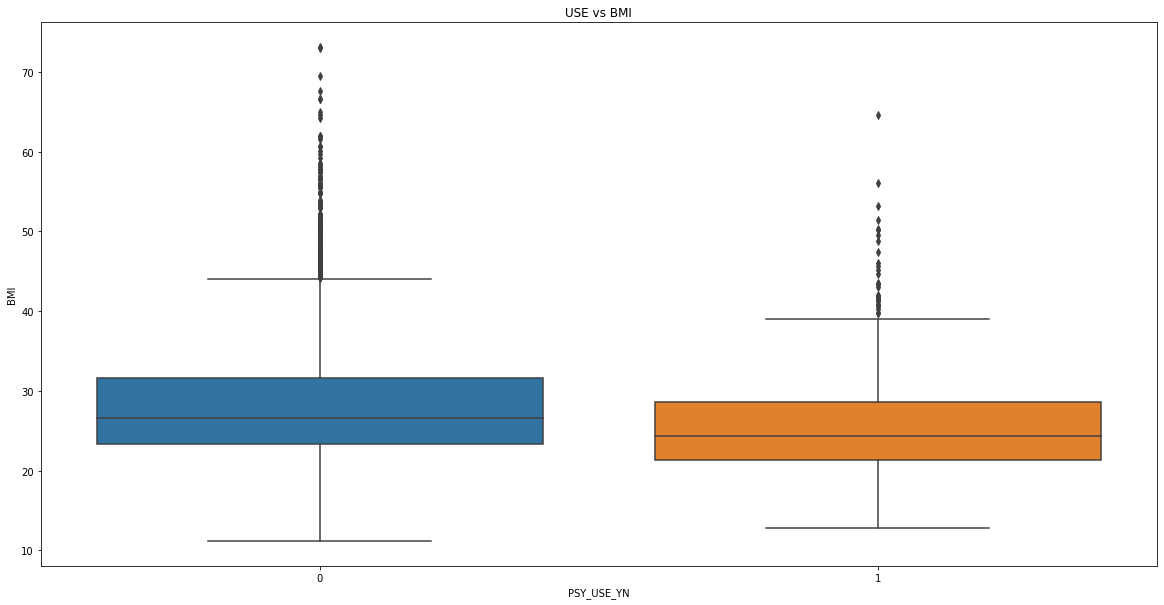

---------------------


Text(0.5, 1.0, 'USE vs MCS12')

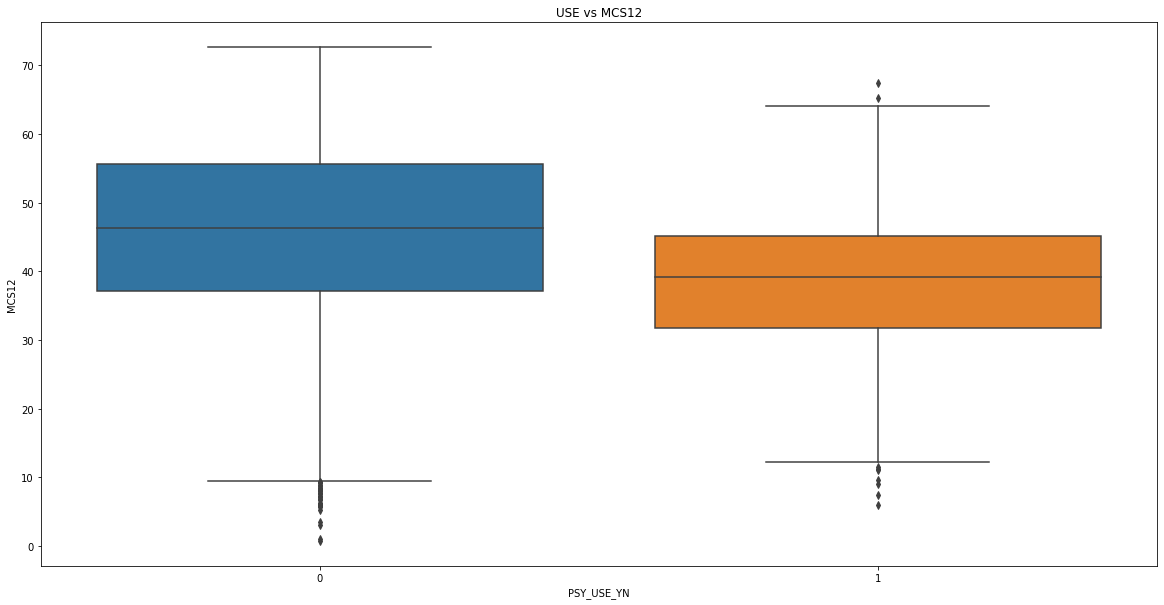

In [ ]:
fig = plt.figure() 
fig.set_size_inches(20,10)
sns.boxplot(x='PSY_USE_YN', y='C_TOTAL', data=psych_preEx)
plt.title ("USE vs C_TOTAL")
plt.show()
print("---------------------")

fig = plt.figure() 
fig.set_size_inches(20,10)
sns.boxplot(x='PSY_USE_YN', y='BMI', data=psych_preEx)
plt.title ("USE vs BMI")
plt.show()

print("---------------------")
fig = plt.figure() 
fig.set_size_inches(20,10)
sns.boxplot(x='PSY_USE_YN', y='MCS12', data=psych_preEx)
plt.title ("USE vs MCS12")



<font color='blue'>There are ALOT more outliers for "several" comorbidities (C_TOTAL) for non-users



A lot of outliers for BMI in non-users, but also a fair amount IN "yes users" 

A few more outliers for MCS12 in non-users</font>

<font color='blue'>THERE ARE MORE NON-USERS WITH HIGHER OUTLIERS THAN PSYCH USERS THAT HAVE HIGHER OUTLIER CCI_SCORES

THIS IS BECAUSE OF THE 7% IMBALANCE </FONT>



---

## REMOVING OUTLIERS WITH WINSORIZATION

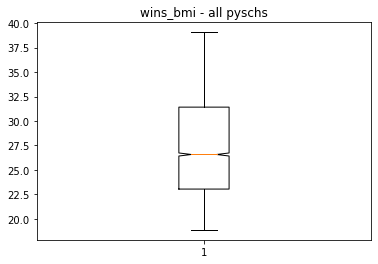

In [ ]:
# REMOVE BMI OUTLIERS ON PSYCH_PREEX
psych_preEx['BMI'] = winsorize(psych_preEx['BMI'],(0.05,0.08)) ## THIS REMOVES THE OUTLIERS AND REPLACES THE BMI VALUES IN THE DF
plt.boxplot(x = psych_preEx['BMI'], notch=True)
plt.title('wins_bmi - all pyschs')
plt.show()

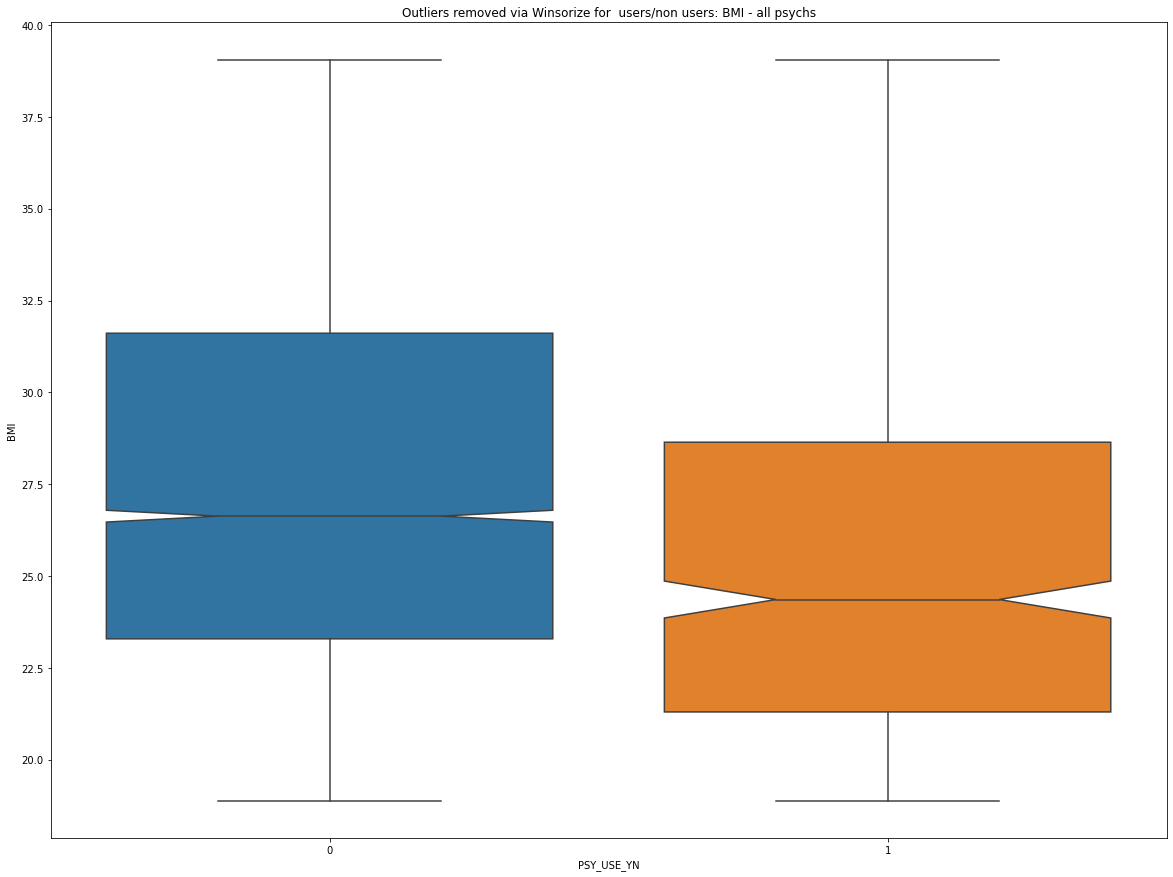

In [ ]:
fig = plt.figure() 
fig.set_size_inches(20,15)
sns.boxplot(x = psych_preEx['PSY_USE_YN'], y= psych_preEx['BMI'], notch=True)
plt.title("Outliers removed via Winsorize for  users/non users: BMI - all psychs")
plt.locator_params(axis='x', nbins=30)
plt.show()

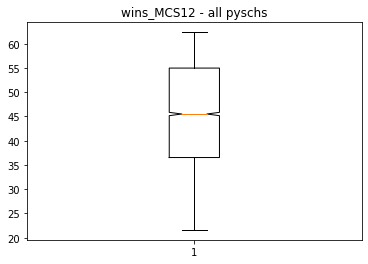

In [ ]:
# REMOVE OUTLIERS ON PSYCH_PREEX MCS12
psych_preEx['MCS12'] = winsorize(psych_preEx['MCS12'],(0.05,0.05)) ## THIS REMOVES THE OUTLIERS AND REPLACES THE MCS12 VALUES IN THE DF
plt.boxplot(x = psych_preEx['MCS12'], notch=True)
plt.title('wins_MCS12 - all pyschs')
plt.show()

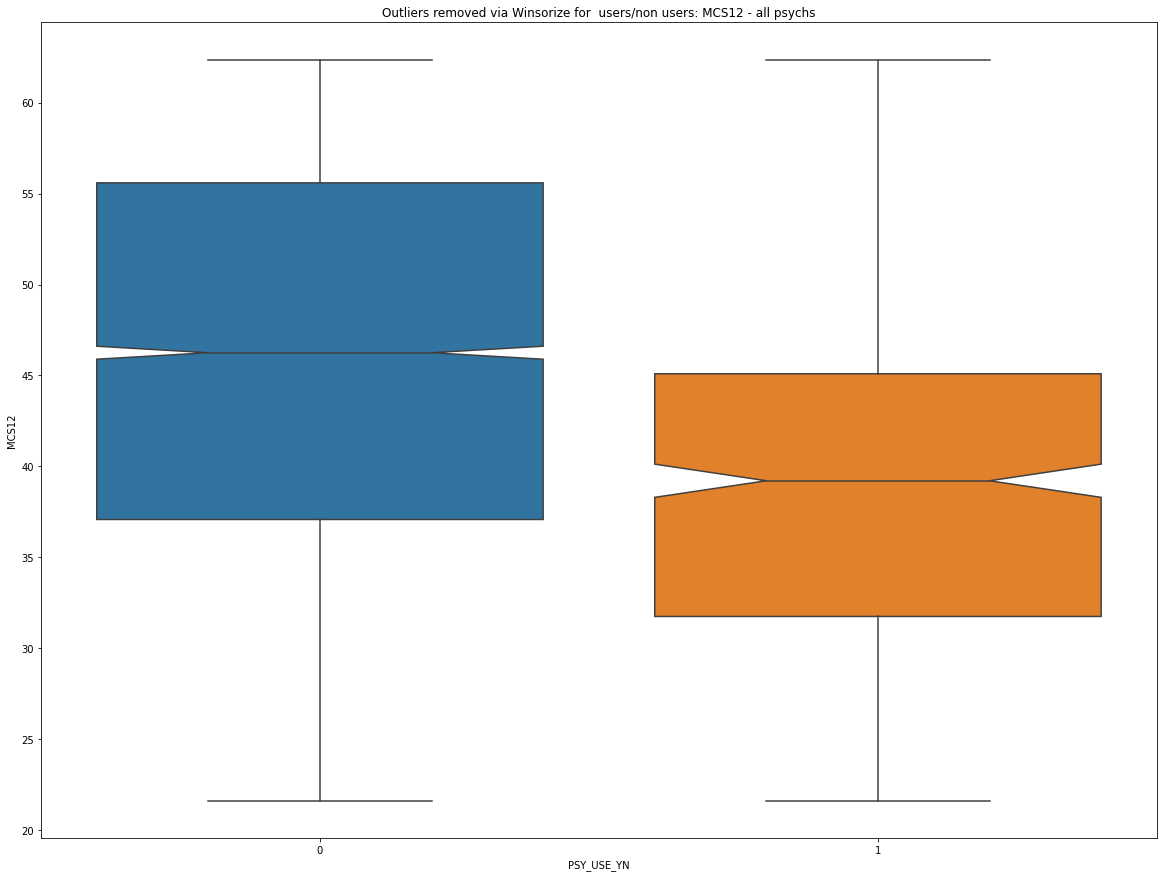

In [ ]:
fig = plt.figure() 
fig.set_size_inches(20,15)
sns.boxplot(x = psych_preEx['PSY_USE_YN'], y= psych_preEx['MCS12'], notch=True)
plt.title("Outliers removed via Winsorize for  users/non users: MCS12 - all psychs")
plt.locator_params(axis='x', nbins=30)
plt.show()

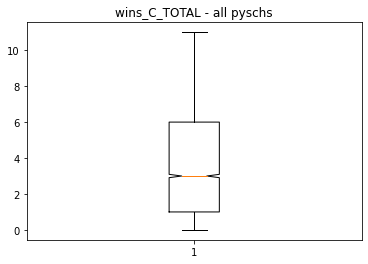

In [ ]:
# REMOVE C_TOTAL OUTLIERS ON PSYCH_PREEX 
psych_preEx['C_TOTAL'] = winsorize(psych_preEx['C_TOTAL'],(0.05,0.05)) ## THIS REMOVES THE OUTLIERS AND REPLACES THE MCS12 VALUES IN THE DF
plt.boxplot(x = psych_preEx['C_TOTAL'], notch=True)
plt.title('wins_C_TOTAL - all pyschs')
plt.show()

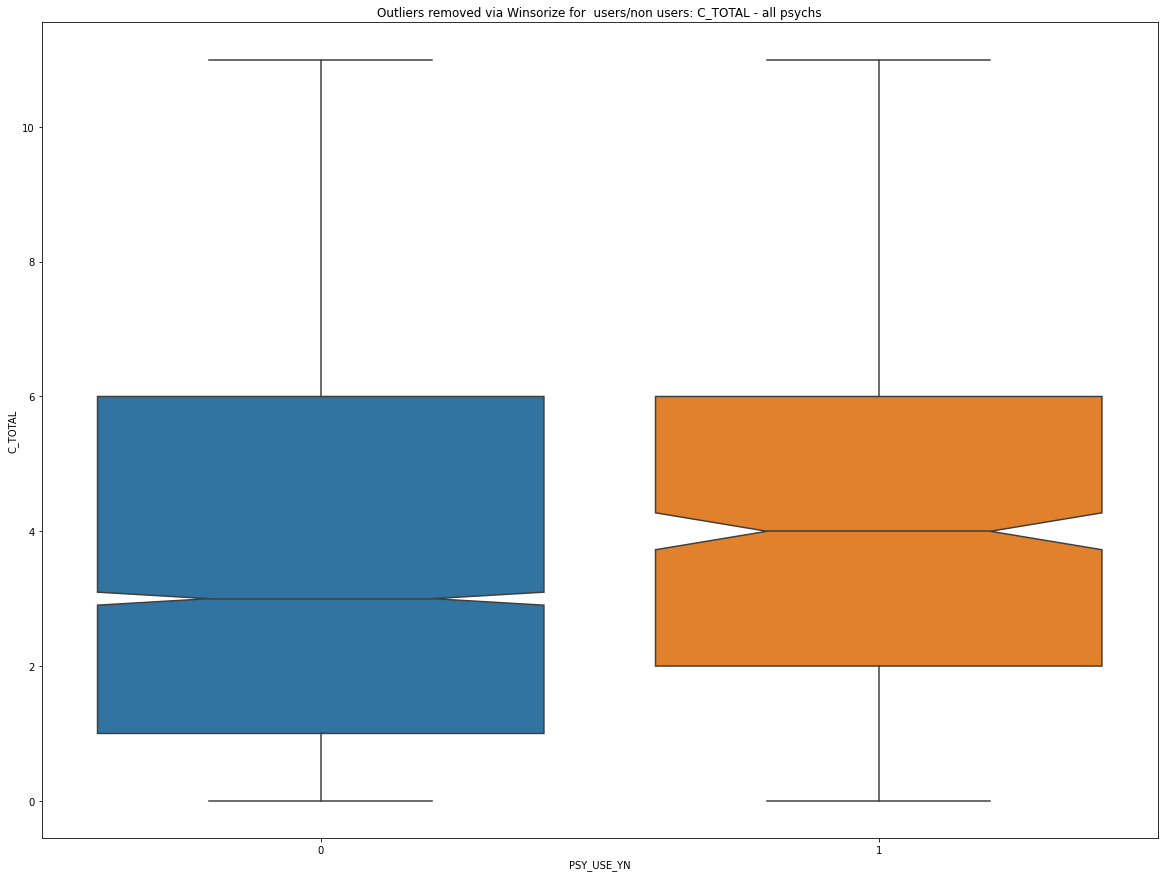

In [ ]:
fig = plt.figure() 
fig.set_size_inches(20,15)
sns.boxplot(x = psych_preEx['PSY_USE_YN'], y= psych_preEx['C_TOTAL'], notch=True)
plt.title("Outliers removed via Winsorize for  users/non users: C_TOTAL - all psychs")
plt.locator_params(axis='x', nbins=30)
plt.show()

In [ ]:
psych_preEx.describe()

,PSY_USE_YN,BMI,KNOWLEDGE,C_TOTAL,CCI_SCORE,MCS12,C_DP,C_ANX,C_PN,C_ALL,...,C_DH,C_SA,C_GERD,C_CS,C_LIP,GAD7_SCORE,PHQ9_SCORE,GAD7_GE10,PHQ9_GE10,RU_OTPCP_YN
count,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,...,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000,7139.000000
mean,0.073680,27.606635,3.432974,3.934865,0.462670,44.895712,0.310828,0.355372,0.445721,0.292898,...,0.144278,0.080684,0.133492,0.136854,0.140916,6.333800,7.330438,0.281552,0.330999,0.208853
std,0.261267,5.869469,1.253445,3.167428,1.002994,11.764630,0.462865,0.478659,0.497080,0.455124,...,0.351396,0.272368,0.340130,0.343717,0.347959,5.894224,6.994088,0.449788,0.470606,0.406517
min,0.000000,18.880000,1.000000,0.000000,0.000000,21.610000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,23.050000,3.000000,1.000000,0.000000,36.535000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,26.580000,3.000000,3.000000,0.000000,45.510000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000
75%,0.000000,31.415000,5.000000,6.000000,0.000000,54.980000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,12.000000,1.000000,1.000000,0.000000
max,1.000000,39.060000,5.000000,11.000000,9.000000,62.370000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,27.000000,1.000000,1.000000,1.000000


NOW BMI MIN/MAX IS 18 TO 39

**RUN STATS.DESCRIBE ON THINGS**

In [ ]:
stats.describe(psych_preEx['C_TOTAL'])


DescribeResult(nobs=7139, minmax=(0, 11), mean=3.9348648270065834, variance=10.032601869509396, skewness=0.6884835251314595, kurtosis=-0.40666801686124643)

In [ ]:
stats.describe(psych_preEx['CCI_SCORE'])

DescribeResult(nobs=7139, minmax=(0, 9), mean=0.46266984171452585, variance=1.0059962892710732, skewness=2.969666703933529, kurtosis=11.730843830541765)

In [ ]:
stats.describe(psych_preEx['BMI'])

DescribeResult(nobs=7139, minmax=(18.88, 39.06), mean=27.606635383106877, variance=34.45067192237353, skewness=0.49540243390739325, kurtosis=-0.7061999014330382)

In [ ]:
stats.describe(psych_preEx['MCS12'])

DescribeResult(nobs=7139, minmax=(21.61, 62.37), mean=44.8957122846337, variance=138.40652130190986, skewness=-0.3276297635798296, kurtosis=-0.8816246581497929)

In [ ]:
stats.describe(psych_preEx['KNOWLEDGE'])

DescribeResult(nobs=7139, minmax=(1, 5), mean=3.4329738058551618, variance=1.5711232790840144, skewness=-0.25494064264380684, kurtosis=-0.9271355545012265)

**LOOKING AT DISTRIBUTIONS OF OTHER CONTINUOUS VARIABLES**

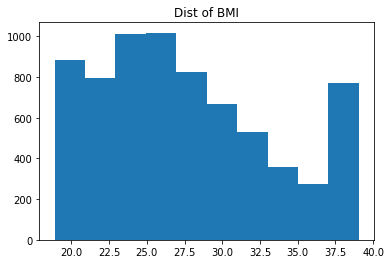

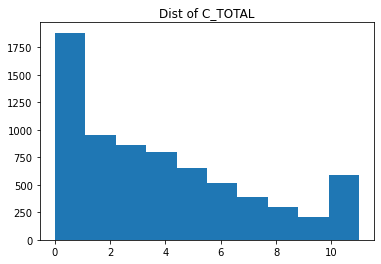

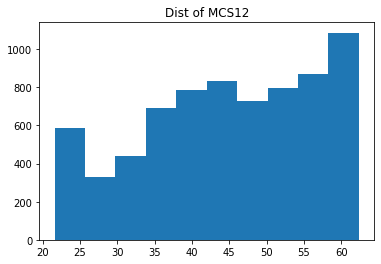

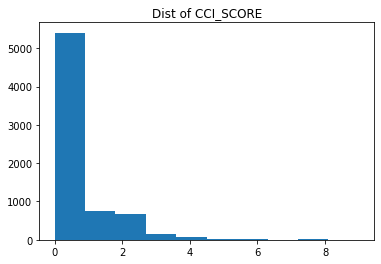

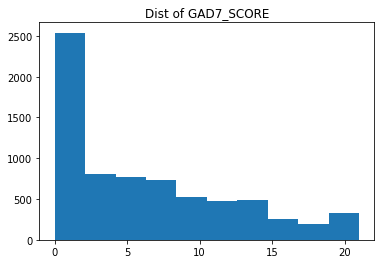

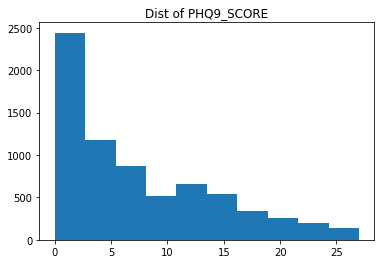

In [ ]:
# HISTROGRAMS FOR ALL PSYCHS
plt.hist(psych_preEx['BMI'])
plt.title("Dist of BMI")
plt.show()

plt.hist(psych_preEx['C_TOTAL'])
plt.title("Dist of C_TOTAL")
plt.show()

plt.hist(psych_preEx['MCS12'])
plt.title("Dist of MCS12")
plt.show()

plt.hist(psych_preEx['CCI_SCORE'])
plt.title("Dist of CCI_SCORE")
plt.show()

plt.hist(psych_preEx['GAD7_SCORE'])
plt.title("Dist of GAD7_SCORE")
plt.show()

plt.hist(psych_preEx['PHQ9_SCORE'])
plt.title("Dist of PHQ9_SCORE")
plt.show()




---

**SCALING ALL PSYCHS CONTINUOUS VARIABLES**

In [ ]:
# transform data = from 0 to 1 - no negatives
scaler_minmax = MinMaxScaler()

In [ ]:
scaledmm_cci_allpsychs = scaler_minmax.fit_transform(psych_preEx[['CCI_SCORE']])
scaledmm_gad_allpsychs = scaler_minmax.fit_transform(psych_preEx[['GAD7_SCORE']])
scaledmm_phq_allpsychs = scaler_minmax.fit_transform(psych_preEx[['PHQ9_SCORE']])
scaledmm_C_total_allpsychs = scaler_minmax.fit_transform(psych_preEx[['C_TOTAL']])
scaledmm_bmi_allpsychs = scaler_minmax.fit_transform(psych_preEx[['BMI']])
scaledmm_mcs12_allpsychs = scaler_minmax.fit_transform(psych_preEx[['MCS12']])
scaledmm_knownusemh_allpsychs = scaler_minmax.fit_transform(psych_preEx[['KNOWLEDGE']])


psych_preEx['CCI_SCORE'] = scaledmm_cci_allpsychs
psych_preEx['GAD7_SCORE'] = scaledmm_gad_allpsychs
psych_preEx['PHQ9_SCORE'] = scaledmm_phq_allpsychs
psych_preEx['BMI'] = scaledmm_bmi_allpsychs
psych_preEx['C_TOTAL'] = scaledmm_C_total_allpsychs
psych_preEx['MCS12'] = scaledmm_mcs12_allpsychs
psych_preEx['KNOWLEDGE'] = scaledmm_knownusemh_allpsychs

print(scaledmm_knownusemh_allpsychs)

[[0.5 ]
 [0.  ]
 [0.5 ]
 ...
 [0.25]
 [0.  ]
 [0.  ]]


In [ ]:
psych_preEx.head()

,PSY_USE_YN,BMI,KNOWLEDGE,C_TOTAL,CCI_SCORE,MCS12,C_DP,C_ANX,C_PN,C_ALL,...,C_DH,C_SA,C_GERD,C_CS,C_LIP,GAD7_SCORE,PHQ9_SCORE,GAD7_GE10,PHQ9_GE10,RU_OTPCP_YN
0,1,0.422696,0.50,0.272727,0.0,0.399657,0,1,0,0,...,0,0,0,0,0,0.142857,0.296296,0,0,0
1,1,0.514371,0.00,0.000000,0.0,0.891070,0,0,0,0,...,0,0,0,0,0,0.000000,0.000000,0,0,0
2,1,0.085233,0.50,0.818182,0.0,0.105496,1,1,1,1,...,0,0,1,0,0,1.000000,0.629630,1,1,0
3,1,0.000000,0.25,0.181818,0.0,0.086359,1,1,0,0,...,0,0,0,0,0,0.238095,0.555556,0,1,0
4,1,0.888008,0.25,0.363636,0.0,0.586850,1,1,0,1,...,0,0,0,0,0,0.619048,0.555556,1,1,1


In [ ]:
psych_preEx.iloc[6730:6740]

,PSY_USE_YN,BMI,KNOWLEDGE,C_TOTAL,CCI_SCORE,MCS12,C_DP,C_ANX,C_PN,C_ALL,...,C_DH,C_SA,C_GERD,C_CS,C_LIP,GAD7_SCORE,PHQ9_SCORE,GAD7_GE10,PHQ9_GE10,RU_OTPCP_YN
6730,0,0.486125,1.00,0.272727,0.000000,0.619725,0,0,0,0,...,0,0,0,1,0,0.142857,0.333333,0,0,0
6731,0,0.202180,1.00,0.000000,0.000000,1.000000,0,0,0,0,...,0,0,0,0,0,0.000000,0.000000,0,0,0
6732,0,0.405352,1.00,0.000000,0.000000,0.940137,0,0,0,0,...,0,0,0,0,0,0.000000,0.000000,0,0,0
6733,0,0.293855,0.75,0.636364,0.000000,1.000000,0,0,1,0,...,0,0,0,0,0,0.000000,0.074074,0,0,0
6734,0,0.381070,1.00,0.363636,0.222222,0.512022,0,0,1,0,...,1,0,1,0,0,0.095238,0.111111,0,0,0
6735,1,0.189792,0.50,0.727273,0.000000,0.498528,1,1,0,1,...,1,0,0,0,0,0.619048,0.666667,1,1,0
6736,1,0.000000,0.00,0.000000,0.000000,0.053974,0,0,0,0,...,0,0,0,0,0,0.142857,0.444444,0,1,0
6737,1,0.187810,0.00,0.636364,0.000000,0.000000,1,1,0,0,...,1,0,0,0,0,0.285714,0.814815,0,1,0
6738,1,0.884539,0.50,0.000000,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0.619048,0.666667,1,1,0
6739,1,0.339941,0.00,0.181818,0.000000,0.110157,1,0,0,0,...,1,0,0,0,0,0.619048,0.370370,1,1,0


In [ ]:
test = psych_preEx[(psych_preEx['PSY_USE_YN'] ==1)]
test.shape
#526 USED vs 6613 NOT-USED

(526, 23)

In [ ]:
psych_preEx['PSY_USE_YN'].sum()

526

**CHECKING CORRELATIONS BETWEEN TARGET AND FEATURES**

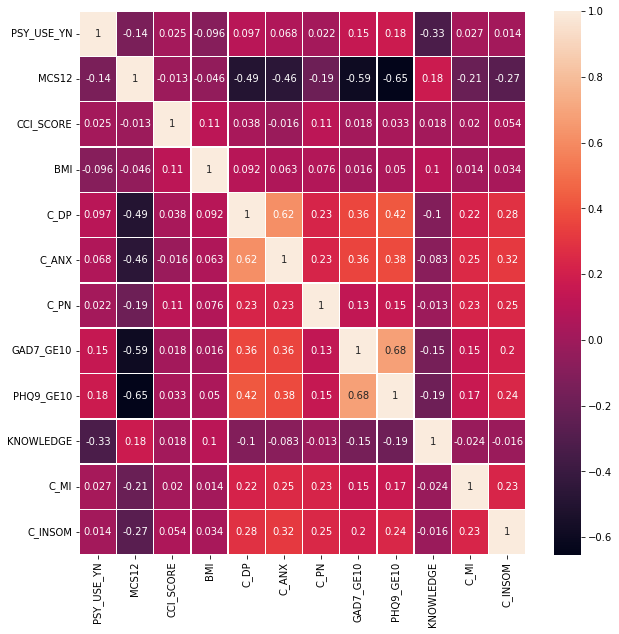

In [ ]:
# CHECKING CORRELATION OF A FEW MENTAL HEALTH RELATED DIAGNOSES AND FEATURES
corr_matrix_all = psych_preEx[['PSY_USE_YN', 'MCS12','CCI_SCORE','BMI','C_DP','C_ANX','C_PN', 'GAD7_GE10','PHQ9_GE10','KNOWLEDGE', 'C_MI', 'C_INSOM']].corr()
#'C_DP','C_ANX','C_PN','GAD7_GE10','PHQ9_GE10','MCS12', 'CCI_SCORE', 'KNOWLEDGE', 'C_MI', 'C_INSOM'
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr_matrix_all, annot=True, linewidths=0.5, ax=ax)
plt.show()

NEGATIVE CORRELATIONS:
* as DEPRESSION goes up, MCS12 goes down - this makes sense because stable MH score is 50 and more unstable MH is less than 50

* same for Anxiety, and GAD7 and PHQ9 bc both GAD7 and PHQ9 high scores indicate unstable mh

<font color = 'blue'> **FOR ALL PSYCHS: CORRELATIONS LOOK GOOD. NO CORRELATIONS TO TARGET (PSYCH USERS) AND FEATURES SEEM TO BE MOSTLY UNRELATED TO EACH OTHER**

EDA:
* checked for nulls/missing values (there were none)
* checked for outliers (removed for BMI, C_TOTAL, MCS12)
* checked correlations between features and target 
* dropped irrelevant features/columns
* checked data types
* checked for dupes (found none)
* used stats.describe to view stats on continuous variable features
* looked at distributions and histograms of continuous variable data
* scaled all continuous variables to 0-1 
* recreated new df to work with considering there were only 122 mushroom-only users (this was to allow for "all psychedelics use")




---

<font color = 'green'>**IMBALANCED DATASET - consider shrinking the sample size (of what will trained) to be a more balanced set of 500 "yes used psychedelics" and 500 "no did not use psychedelics" so from there create random samples from the 500 of each to build the X, Y splits**</font>

Depression counts for users/non-users: MUSHROOMS


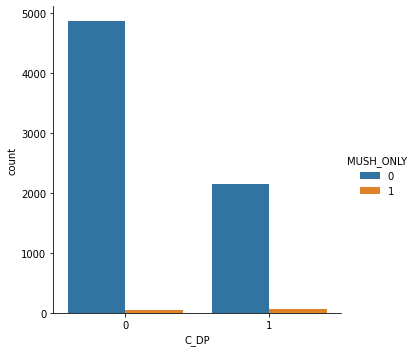

In [ ]:
#CATPLOT  - PLOTTING AGAINST COUNTS OF 0/1s FOR JUST MUSHROOM USE
sns.catplot(x='C_DP',hue='MUSH_ONLY',data=mush_preEx,kind="count")
print("Depression counts for users/non-users: MUSHROOMS")

<font color='red'>WOW - THAT'S A LOT OF NON-USERS - MUST REVISIT AND CONSIDER ALL PSYCHS USE</font>

It is this graph that made be go back and create a dataset for "all psychedelic use", not "just mushroom use"

COUNTS: all psychs - use and Depression


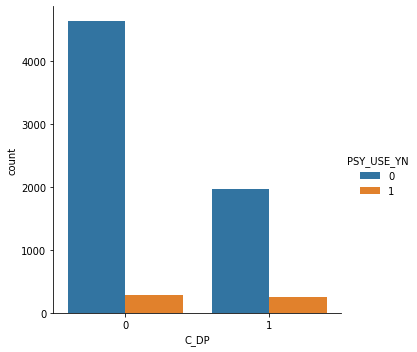

In [ ]:
#PLOTTING AGAINST COUNTS OF 0/1s FOR ALL PSYCHEDELICS USERS
sns.catplot(x='C_DP',hue='PSY_USE_YN',data=psych_preEx,kind="count")
print("COUNTS: all psychs - use and Depression")
#that's a tad better at least

COUNTS: all psychs - use and KNOWLEDGE


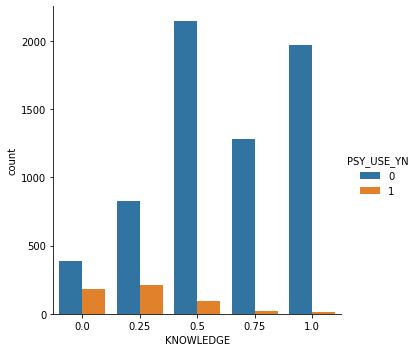

In [ ]:
#PLOTTING AGAINST COUNTS OF 0/1s FOR ALL PSYCHEDELICS USERS
sns.catplot(x='KNOWLEDGE',hue='PSY_USE_YN',data=psych_preEx,kind="count")
print("COUNTS: all psychs - use and KNOWLEDGE")
#that's a tad better at least

0 AND 0.25 ARE "STRONGLY AGREE and AGREE THAT HAVE HEARD OF PSYCHS FOR MH CARE"

<font color='blue'>**EXPERIMENTING WITH SAMPLE SIZING**

## UNDERSAMPLE FOR IMBALANCED DATA - sample1k

keeping all 500 USERS and matching with random 500 NONUSERS<br>
https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html

In [ ]:
# i want 500 rows of Yes Users and 500 rows on nonUsers
sample500 = psych_preEx[(psych_preEx['PSY_USE_YN'] >= 1)].sample(n=500)
sample500


,PSY_USE_YN,BMI,KNOWLEDGE,C_TOTAL,CCI_SCORE,MCS12,C_DP,C_ANX,C_PN,C_ALL,...,C_DH,C_SA,C_GERD,C_CS,C_LIP,GAD7_SCORE,PHQ9_SCORE,GAD7_GE10,PHQ9_GE10,RU_OTPCP_YN
41,1,0.139742,0.25,0.272727,0.000000,0.204858,0,1,0,1,...,0,0,0,0,0,0.571429,0.592593,1,1,0
8,1,0.265114,0.25,0.272727,0.000000,0.113837,1,1,0,0,...,0,0,0,0,0,0.523810,0.703704,1,1,0
6777,1,0.117443,0.50,0.727273,0.000000,0.277723,1,1,1,1,...,1,0,0,1,0,0.428571,0.555556,0,1,0
6961,1,1.000000,0.25,0.363636,0.000000,0.607949,1,1,0,0,...,0,0,0,0,0,0.333333,0.518519,0,1,1
6857,1,0.548563,0.00,0.545455,0.222222,0.354024,1,1,1,0,...,0,0,0,0,0,0.523810,0.259259,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6799,1,0.468781,0.00,0.363636,0.000000,0.769627,1,1,1,0,...,1,0,0,0,0,0.142857,0.222222,0,0,0
114,1,0.411794,0.25,0.363636,0.222222,0.486997,1,0,1,0,...,0,0,0,0,0,0.571429,0.481481,1,1,0
6864,1,0.000000,0.25,0.636364,0.000000,0.000000,1,1,0,0,...,0,0,0,0,0,0.904762,0.888889,1,1,1
6986,1,0.000000,0.25,0.000000,0.000000,0.184495,0,0,0,0,...,0,0,0,0,0,0.285714,0.555556,0,1,0


In [ ]:
# i want 500 rows of Yes Users and 500 rows on nonUsers
samplenon500 = psych_preEx[(psych_preEx['PSY_USE_YN'] ==0)].sample(n=500)
samplenon500


,PSY_USE_YN,BMI,KNOWLEDGE,C_TOTAL,CCI_SCORE,MCS12,C_DP,C_ANX,C_PN,C_ALL,...,C_DH,C_SA,C_GERD,C_CS,C_LIP,GAD7_SCORE,PHQ9_SCORE,GAD7_GE10,PHQ9_GE10,RU_OTPCP_YN
2335,0,0.832012,1.00,1.000000,0.000000,0.000000,1,1,1,1,...,1,1,0,1,0,0.571429,0.592593,1,1,1
1818,0,0.863726,0.25,0.545455,0.000000,0.348871,1,1,0,0,...,1,0,0,0,1,0.476190,0.592593,1,1,1
4673,0,0.000000,0.50,0.272727,0.000000,0.800049,0,1,1,1,...,0,0,0,0,0,0.000000,0.074074,0,0,0
2095,0,0.424182,1.00,0.363636,0.000000,0.820412,0,1,1,0,...,1,0,0,0,0,0.190476,0.185185,0,0,0
850,0,0.061447,0.50,0.454545,0.222222,0.430569,1,1,0,1,...,0,0,0,0,0,0.333333,0.148148,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,0.919722,0.75,1.000000,0.000000,0.084396,1,1,1,0,...,0,0,0,0,0,0.666667,0.259259,1,0,0
2326,0,0.383548,1.00,0.909091,0.000000,0.000000,1,1,0,1,...,1,0,0,1,1,0.904762,0.851852,1,1,1
3989,0,0.521804,0.50,0.000000,0.000000,0.940628,0,0,0,0,...,0,0,0,0,0,0.000000,0.000000,0,0,0
2817,0,0.586720,0.25,0.636364,0.222222,0.114082,1,0,0,1,...,0,0,0,1,0,0.476190,0.555556,1,1,1


In [ ]:
samplenon500['PSY_USE_YN'].sum()

0

In [ ]:
samplecombo =[sample500, samplenon500]

In [ ]:
sample1k = pd.concat(samplecombo)
sample1k

,PSY_USE_YN,BMI,KNOWLEDGE,C_TOTAL,CCI_SCORE,MCS12,C_DP,C_ANX,C_PN,C_ALL,...,C_DH,C_SA,C_GERD,C_CS,C_LIP,GAD7_SCORE,PHQ9_SCORE,GAD7_GE10,PHQ9_GE10,RU_OTPCP_YN
41,1,0.139742,0.25,0.272727,0.000000,0.204858,0,1,0,1,...,0,0,0,0,0,0.571429,0.592593,1,1,0
8,1,0.265114,0.25,0.272727,0.000000,0.113837,1,1,0,0,...,0,0,0,0,0,0.523810,0.703704,1,1,0
6777,1,0.117443,0.50,0.727273,0.000000,0.277723,1,1,1,1,...,1,0,0,1,0,0.428571,0.555556,0,1,0
6961,1,1.000000,0.25,0.363636,0.000000,0.607949,1,1,0,0,...,0,0,0,0,0,0.333333,0.518519,0,1,1
6857,1,0.548563,0.00,0.545455,0.222222,0.354024,1,1,1,0,...,0,0,0,0,0,0.523810,0.259259,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,0.919722,0.75,1.000000,0.000000,0.084396,1,1,1,0,...,0,0,0,0,0,0.666667,0.259259,1,0,0
2326,0,0.383548,1.00,0.909091,0.000000,0.000000,1,1,0,1,...,1,0,0,1,1,0.904762,0.851852,1,1,1
3989,0,0.521804,0.50,0.000000,0.000000,0.940628,0,0,0,0,...,0,0,0,0,0,0.000000,0.000000,0,0,0
2817,0,0.586720,0.25,0.636364,0.222222,0.114082,1,0,0,1,...,0,0,0,1,0,0.476190,0.555556,1,1,1


In [ ]:
sample1k.iloc[495:505] ##CHECKING THE BREAK AT ROW 500

,PSY_USE_YN,BMI,KNOWLEDGE,C_TOTAL,CCI_SCORE,MCS12,C_DP,C_ANX,C_PN,C_ALL,...,C_DH,C_SA,C_GERD,C_CS,C_LIP,GAD7_SCORE,PHQ9_SCORE,GAD7_GE10,PHQ9_GE10,RU_OTPCP_YN
6799,1,0.468781,0.00,0.363636,0.000000,0.769627,1,1,1,0,...,1,0,0,0,0,0.142857,0.222222,0,0,0
114,1,0.411794,0.25,0.363636,0.222222,0.486997,1,0,1,0,...,0,0,0,0,0,0.571429,0.481481,1,1,0
6864,1,0.000000,0.25,0.636364,0.000000,0.000000,1,1,0,0,...,0,0,0,0,0,0.904762,0.888889,1,1,1
6986,1,0.000000,0.25,0.000000,0.000000,0.184495,0,0,0,0,...,0,0,0,0,0,0.285714,0.555556,0,1,0
34,1,1.000000,0.25,0.181818,0.000000,0.460746,0,1,0,0,...,0,0,0,0,0,0.523810,0.370370,1,1,0
2335,0,0.832012,1.00,1.000000,0.000000,0.000000,1,1,1,1,...,1,1,0,1,0,0.571429,0.592593,1,1,1
1818,0,0.863726,0.25,0.545455,0.000000,0.348871,1,1,0,0,...,1,0,0,0,1,0.476190,0.592593,1,1,1
4673,0,0.000000,0.50,0.272727,0.000000,0.800049,0,1,1,1,...,0,0,0,0,0,0.000000,0.074074,0,0,0
2095,0,0.424182,1.00,0.363636,0.000000,0.820412,0,1,1,0,...,1,0,0,0,0,0.190476,0.185185,0,0,0
850,0,0.061447,0.50,0.454545,0.222222,0.430569,1,1,0,1,...,0,0,0,0,0,0.333333,0.148148,0,0,1


Depression and Use of All Psychs: COUNTS


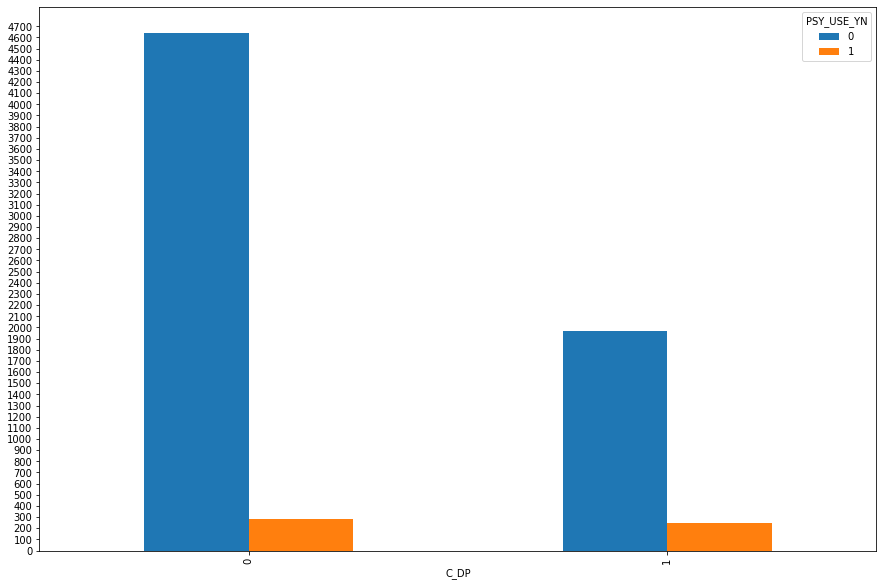

In [ ]:
pd.crosstab(psych_preEx['C_DP'], psych_preEx['PSY_USE_YN']).plot(kind='bar', stacked=False, figsize=(15, 10))
plt.yticks(np.arange(0.00, 4800, step=100))
print("Depression and Use of All Psychs: COUNTS")

THESE ARE SOME TELLING #S BELOW

In [ ]:
use_highPHQ = psych_preEx[(psych_preEx['PSY_USE_YN'] ==1) & (psych_preEx['PHQ9_GE10']==1)]
use_highPHQ.shape
#329 rows - high phq indicates depression

(329, 23)

In [ ]:
use_lowPHQ  = psych_preEx[(psych_preEx['PSY_USE_YN'] ==1) & (psych_preEx['PHQ9_GE10'] == 0)]
use_lowPHQ .shape
#197 rows based on low PHQ (no depression)

(197, 23)

In [ ]:
use_depression = psych_preEx[(psych_preEx['PSY_USE_YN'] ==1) & (psych_preEx['C_DP'] == 1)]
use_depression.shape
#247 rows (reported yes depression in previous year)

(247, 23)

In [ ]:
use_nodepression = psych_preEx[(psych_preEx['PSY_USE_YN'] ==1) & (psych_preEx['C_DP'] == 0)]
use_nodepression.shape
# 279 rows (reported no dpression previous 1 year)

(279, 23)

Anxiety and Use of All Psychs: COUNTS


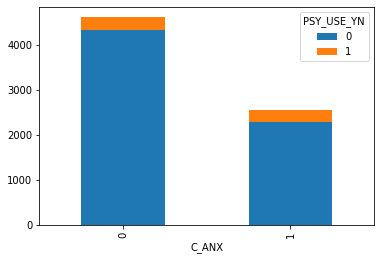

In [ ]:
pd.crosstab(psych_preEx['C_ANX'], psych_preEx['PSY_USE_YN']).plot.bar(stacked=True)
print("Anxiety and Use of All Psychs: COUNTS")

HIGH GAD7 and Use of All Psychs: COUNTS


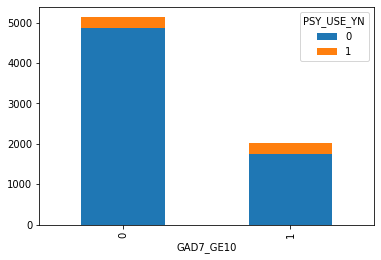

In [ ]:
pd.crosstab(psych_preEx['GAD7_GE10'], psych_preEx['PSY_USE_YN']).plot.bar(stacked=True)
print("HIGH GAD7 and Use of All Psychs: COUNTS")

(these are all showing that 7% use ration on the entire dataset)

DEPRESSION and Use of Sample1k: COUNTS


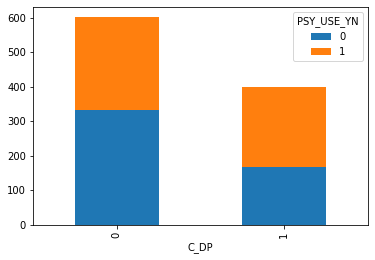

In [ ]:
pd.crosstab(sample1k['C_DP'], sample1k['PSY_USE_YN']).plot.bar(stacked=True)
print("DEPRESSION and Use of Sample1k: COUNTS")

visual: higher percentage of use with reported depression

ANXIETY and Use of Sample1k: COUNTS


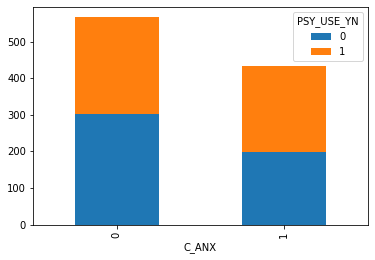

In [ ]:
pd.crosstab(sample1k['C_ANX'], sample1k['PSY_USE_YN']).plot.bar(stacked=True)
print("ANXIETY and Use of Sample1k: COUNTS")

visual: higher percentage of use with reported anxiety

CHRONIC PAIN and Use of Sample1k: COUNTS


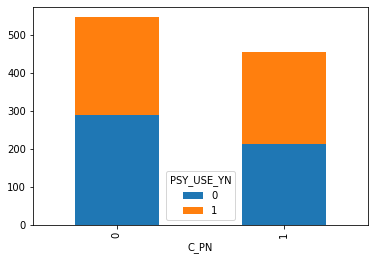

In [ ]:
pd.crosstab(sample1k['C_PN'], sample1k['PSY_USE_YN']).plot.bar(stacked=True)
print("CHRONIC PAIN and Use of Sample1k: COUNTS")

visual: about the same for use with reported chronic pain

GAD7_GE10 HIGH ANXIETY and Use of Sample1k: COUNTS


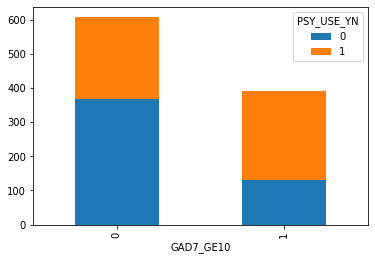

In [ ]:
pd.crosstab(sample1k['GAD7_GE10'], sample1k['PSY_USE_YN']).plot.bar(stacked=True)
print("GAD7_GE10 HIGH ANXIETY and Use of Sample1k: COUNTS")

visual: considerate higher percentage of use with high GAD score

LIKELY DEPRESSION PHQ GE10 and Use of Sample1k: COUNTS


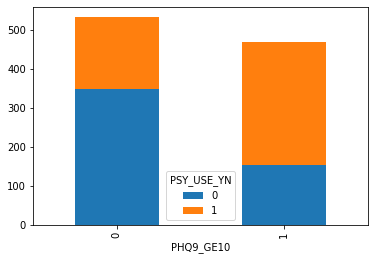

In [ ]:
pd.crosstab(sample1k['PHQ9_GE10'], sample1k['PSY_USE_YN']).plot.bar(stacked=True)
print("LIKELY DEPRESSION PHQ GE10 and Use of Sample1k: COUNTS")

visual: considerate higher percentage of use with high PHQ score

MCS12 SCORE < .5 and Use of Sample1k: COUNTS


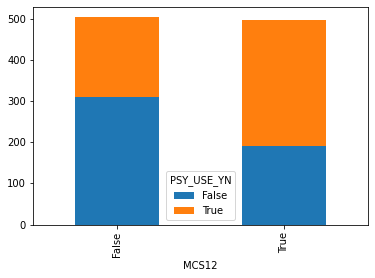

In [ ]:
pd.crosstab((sample1k['MCS12'] < 0.5), (sample1k['PSY_USE_YN'] ==1)).plot.bar(stacked=True) 
# USING lower than 50% for Poor mental health (actual scores lower than 50 indicate poor MH)
# MCS12 scaled 0-1. Closer to 1 would be higher values (ie 72) which indicates good MH condition. 
# Closer to 0 (scaled) would indicate poor MH condition (closer to zero, farther from '50' as the benchmark of good mental health condition)
print("MCS12 SCORE < .5 and Use of Sample1k: COUNTS")

visual: those with scaled scores less than 0.5 are using more

<font color = ' red'>**OBJECTIVE: Can a set of conditions/comorbidity/pre-existing conditions/MH score 'predict' a Psychedelics user?** </font>

<font color = 'blue'> Can we predict a Psychedelics User yes/no depending on conditions?</font>

# MODEL TRAINING ON SAMPLE860

**CREATING NEW SAMPLE SET**

Examining the KNOWLEDGE feature: The question asked was:<br>
"In the last 6 months  heard more than usual about the positive uses of psychedelic drugs for mental health issues (depression, PTSD, addiction, etc.)" 

Answers offered: <br>
1:Strongly agree; 2:Agree; 3:Neither agree nor disagree; 4:Disagree; 5:Strongly disagree

I removed answers that corresponded to 3: Neither agree nor disagree as I wanted specific yes/no answers regarding "have heard or, or not"

Answer 3 corresponded to 0.5 in scaled version

In [ ]:
# removing 0.5 answers ("3" in actual replies) from USERS reduced dataset from 1000 to 860
sample430 = psych_preEx[(psych_preEx['PSY_USE_YN'] ==1)& (psych_preEx['KNOWLEDGE'] != 0.5)].sample(n=430)

In [ ]:
samplenon430 = psych_preEx[(psych_preEx['PSY_USE_YN'] ==0) & (psych_preEx['KNOWLEDGE'] != 0.5)].sample(n=430)


In [ ]:
samplecombo =[sample430, samplenon430]

In [ ]:
sample860 = pd.concat(samplecombo)


# STANDARD LOGISTIC REGRESSION ON sample860


In [ ]:
# STARTING WITH A SMALL SET OF CONDITIONS MOSTLY RELATED TO MENTAL HEALTH OR KNOWN PSYCHEDELICS MEDICAL USE
# (TRAUMA, CHRONIC PAIN, ANXIETY, DEPRESSION, ADDICTION)

#X = sample860[['C_DP','C_ANX','C_PN','GAD7_GE10','PHQ9_GE10','MCS12']] #DROPPED BMI AND CCI_SCORE

#X = sample860[['GAD7_GE10','PHQ9_GE10','MCS12']] #DROPPED ACTUAL CONDITIONS - JUST USED SCORES

#X = sample860[['C_DP','C_ANX','C_PN']] #DROPPED SCORES - JUST USING 3 CONDITIONS

#X = sample860[['C_DP','C_ANX','C_PN','GAD7_GE10','PHQ9_GE10','MCS12', 'CCI_SCORE','C_TOTAL','BMI']] # SCORES & CONDITIONS + CCI + BMI

#X = sample860[['C_DP','C_ANX','C_PN','GAD7_GE10','PHQ9_GE10','MCS12', 'CCI_SCORE','C_TOTAL','BMI','C_GERD']] # + GERD

# 5 CONDITIONS, SCORES AND KNOWLEDGE, no c_total
X = sample860[['C_DP','C_ANX','C_PN','GAD7_GE10','PHQ9_GE10','MCS12', 'CCI_SCORE', 'KNOWLEDGE', 'C_MI', 'C_INSOM']]
              # DROPPED BMI, + MIGRAINE, +IMSOM, +OTHER PCP, 
              # + KNOWN USE MH, dropped 'RU_OTPCP_YN' (other PCP), dropped 'C_TOTAL',

# NO KNOWLEDGE  AND 5 CONDITIONS, scores, no c_total          
#X = sample860[['C_DP','C_ANX','C_PN','GAD7_GE10','PHQ9_GE10','MCS12', 'CCI_SCORE','C_MI', 'C_INSOM']] 
#DROPPED BMI, c_total, + MIGRAINE, +IMSOM, + KNOWN USE MH, dropped 'RU_OTPCP_YN'

HERE YOU CAN SEE WHERE I EXPERIMENTED WITH SEVERAL DIFFERENT FEATURE SETS. 

AT FIRST - MY SCORES PREDICTING ON JUST MENTAL HEALTH CONDITIONS AND SCORES WERE POOR - RANGING IN THE LOW 70s - IT WAS AT THIS POINT I WENT BACK AND RE-ENGINEERED MY SAMPLE TO ALSO INCLUDE 'KNOWLEDGE' - WHICH IS THE QUESTION OF IF SOME HAD / HAD NOT HEARD OF PSYCHEDELIC USE AS A THERAPEUTIC MODALITY. 

SEE DATA PROCESSING OF USERS WITH NO PRIOR KNOWLEDGE AT 
https://colab.research.google.com/drive/1puHp_uzeEPCVm-Xg-RKsS4jBwqyyppPr?usp=sharing



<font color = ' red'>**REVISED OBJECTIVE: Can pre-existing mental health conditions and/or recent previous knowledge of pyschedelic therapeutic use 'predict' a Psychedelics user?** </font>

<font color = 'blue'> Can we predict a Psychedelics User (yes/no) depending on conditions and prior knowledge?</font>

In [ ]:
y = sample860['PSY_USE_YN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 222)

In [ ]:
len(X_train),  len(X_test),len(y_train), len(y_test)

(688, 172, 688, 172)

In [ ]:
# lr = LogisticRegression(solver='lbfgs', random_state=20, max_iter=1000)
# lr.fit(X_train, y_train)

lr = LogisticRegression(solver='liblinear', random_state=20, max_iter=1000, penalty='l1')
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='l1', random_state=20,
                   solver='liblinear')

In [ ]:
y_preds = lr.predict(X_test)
y_preds

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [ ]:
trainscore= lr.score(X_train,y_train)
trainscore

0.8328488372093024

In [ ]:
testscore = lr.score(X_test, y_test)
testscore

0.8488372093023255

Pretty close - sometimes underfit, sometimes just right

In [ ]:
report = classification_report(y_test, y_preds) # LIBLIN, l1
print(report)

              precision    recall  f1-score   support

           0       0.93      0.76      0.83        86
           1       0.79      0.94      0.86        86

    accuracy                           0.85       172
   macro avg       0.86      0.85      0.85       172
weighted avg       0.86      0.85      0.85       172



AFTER TUNING - CAN SEE THAT LIBLINEAR SOLVER DOES A TINY BIT BETTER - SO CHANGING THIS MAIN LR MODEL TO LIBLINEAR.

IT WAS LBFGS AT 1000 ITERS

**MODEL TUNING**

In [ ]:
lr_L2= LogisticRegression( solver='liblinear', random_state=20, max_iter=1000, penalty='l2')
lr_L2.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=20, solver='liblinear')

In [ ]:
y_preds_liblin_L2 = lr_L2.predict(X_test)
y_preds_liblin_L2

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [ ]:
report = classification_report(y_test, y_preds_liblin_L2) # LIBLIN
print(report)

# not much change with l2 regularization

              precision    recall  f1-score   support

           0       0.93      0.76      0.83        86
           1       0.79      0.94      0.86        86

    accuracy                           0.85       172
   macro avg       0.86      0.85      0.85       172
weighted avg       0.86      0.85      0.85       172



In [ ]:
lr_liblinear_1000 = LogisticRegression(solver='liblinear', random_state=20, max_iter=1000)
lr_liblinear_1000.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=20, solver='liblinear')

In [ ]:
y_preds_liblin_1000 = lr_liblinear_1000.predict(X_test)
y_preds_liblin_1000

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [ ]:
lr_sag = LogisticRegression(solver='sag', random_state=20, max_iter=1000)
lr_sag.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=20, solver='sag')

In [ ]:
y_preds_sag = lr_sag.predict(X_test)
y_preds_sag

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [ ]:
lr_saga = LogisticRegression(solver='saga', random_state=20, max_iter=1000)
lr_saga.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=20, solver='saga')

In [ ]:
y_preds_saga = lr_saga.predict(X_test)
y_preds_saga

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [ ]:
#LIBLINEAR RESULTS
report = classification_report(y_test, y_preds_liblin_1000) # LIBLIN
print(report)

              precision    recall  f1-score   support

           0       0.93      0.76      0.83        86
           1       0.79      0.94      0.86        86

    accuracy                           0.85       172
   macro avg       0.86      0.85      0.85       172
weighted avg       0.86      0.85      0.85       172



LIBLINEAR DID A TINY BIT BETTER FOR PRECISION, RECALL AND F1 <br>
iters dont make a differnce

In [ ]:
#SAG RESULTS
report = classification_report(y_test, y_preds_sag) 
print(report)

              precision    recall  f1-score   support

           0       0.93      0.76      0.83        86
           1       0.79      0.94      0.86        86

    accuracy                           0.85       172
   macro avg       0.86      0.85      0.85       172
weighted avg       0.86      0.85      0.85       172



SAG MADE NO DIFFERENCE FROM ORIG LBFGS OR LIBLINEAR

In [ ]:
#SAGA RESULTS
report = classification_report(y_test, y_preds_saga)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.76      0.83        86
           1       0.79      0.94      0.86        86

    accuracy                           0.85       172
   macro avg       0.86      0.85      0.85       172
weighted avg       0.86      0.85      0.85       172



SAGA MADE NO DIFFERENCE FROM ORIG LBFGS or LIBLINEAR

## <font color='red'>STANDARD, TUNED LOG REG ON SAMPLE860 RESULTS</font>

In [ ]:
report = classification_report(y_test, y_preds) # ORIG LOGREG - LIBLINEAR WITH L1
print(report)

              precision    recall  f1-score   support

           0       0.93      0.76      0.83        86
           1       0.79      0.94      0.86        86

    accuracy                           0.85       172
   macro avg       0.86      0.85      0.85       172
weighted avg       0.86      0.85      0.85       172



KNOWLEDGE YES and USE YES of Sample860: COUNTS


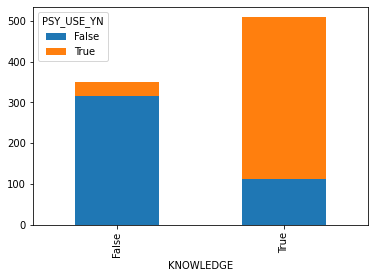

In [ ]:
# CROSS TAB ON USE YES AND KNOWLEDGE YES
pd.crosstab((sample860['KNOWLEDGE'] <= 0.26), (sample860['PSY_USE_YN'] ==1)).plot.bar(stacked=True)
print("KNOWLEDGE YES and USE YES of Sample860: COUNTS")
# 0 and .25 correspond to "(1) strongly agree and (2) agree have heard of them")

**THIS SHOWS THAT KNOWLEDGE IS RELATED TO USE**

HIGH GAD  and USE YES of Sample860: COUNTS


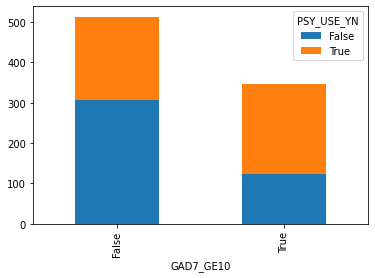

In [ ]:
# CROSS TAB ON USE YES AND HIGH GAD
pd.crosstab((sample860['GAD7_GE10'] == 1), (sample860['PSY_USE_YN'] ==1)).plot.bar(stacked=True)
print("HIGH GAD  and USE YES of Sample860: COUNTS")


CHRONIC PAIN  and USE YES of Sample860: COUNTS


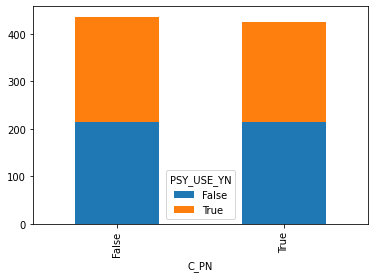

In [ ]:
# CROSS TAB ON USE YES AND PAIN
pd.crosstab((sample860['C_PN'] == 1), (sample860['PSY_USE_YN'] ==1)).plot.bar(stacked=True)
print("CHRONIC PAIN  and USE YES of Sample860: COUNTS")


ANX  and USE YES of Sample860: COUNTS


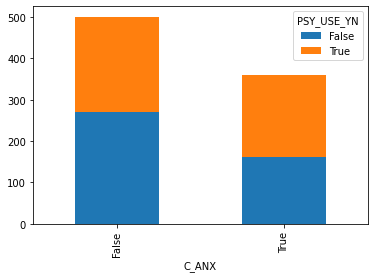

In [ ]:
# CROSS TAB ON USE YES AND ANX
pd.crosstab((sample860['C_ANX'] == 1), (sample860['PSY_USE_YN'] ==1)).plot.bar(stacked=True)
print("ANX  and USE YES of Sample860: COUNTS")

DEPRESSION SCORE and USE YES of Sample860: COUNTS


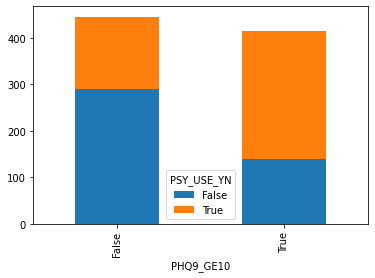

In [ ]:
# CROSS TAB ON USE YES AND DEPRESS SCORE
pd.crosstab((sample860['PHQ9_GE10'] == 1), (sample860['PSY_USE_YN'] ==1)).plot.bar(stacked=True)
print("DEPRESSION SCORE and USE YES of Sample860: COUNTS")

DEPRESSION REPORTED and USE YES of Sample860: COUNTS


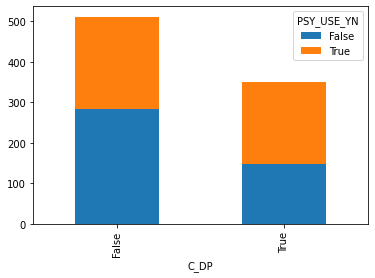

In [ ]:
# CROSS TAB ON USE YES AND DEPRESSSION
pd.crosstab((sample860['C_DP'] == 1), (sample860['PSY_USE_YN'] ==1)).plot.bar(stacked=True)
print("DEPRESSION REPORTED and USE YES of Sample860: COUNTS")

In [ ]:
sample860["MCS12"].median()

0.49975466143277725

LOWER < 0.5 MCS12 and USE YES of Sample860: COUNTS


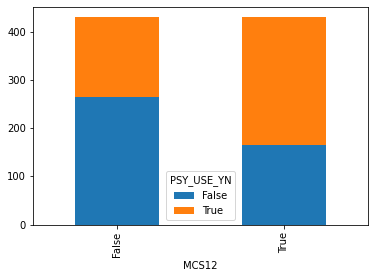

In [ ]:
# CROSS TAB ON USE YES AND MCS12
pd.crosstab((sample860['MCS12'] < 0.50), (sample860['PSY_USE_YN'] ==1)).plot.bar(stacked=True)
print("LOWER < 0.5 MCS12 and USE YES of Sample860: COUNTS")
# USING lower than 50% for Poor mental health (actual scores lower than 50 indicate poor MH)
# MCS12 scaled 0-1. Closer to 1 would be higher values (ie 72) which indicates good MH condition. 
# Closer to 0 (scaled) would indicate poor MH condition (closer to zero, farther from '50' as the benchmark of good mental health condition)

## SCORES FOR STD LOG REG ON sample860

In [ ]:
accuracy860 = accuracy_score(y_test, y_preds).round(2) #sci-kit learn does this for you
precision860 = precision_score(y_test, y_preds).round(2) #sci-kit learn does this for you
recall860 = recall_score(y_test, y_preds).round(2) #sci-kit learn does this for you
f1860 = f1_score(y_test, y_preds).round(2) #sci-kit learn does this for you
fbeta_precision = fbeta_score(y_test, y_preds, beta=0.5).round(2) # beta value is <1 less than 1 ##not working
fbeta_recall = fbeta_score(y_test, y_preds, beta=2).round(2) #beta value is >1, greater than 1 ##not working

print("accuracy Std LogReg sample860: ", accuracy860)
print("precison Std LogReg sample860: ", precision860)
print("recall Std LogReg sample860: ", recall860)
print("f1 Std LogReg sample860: ", f1860)
print("fBeta Precision Std LogReg sample860: ", fbeta_precision)
print("fBeta Recall Std LogReg sample860: ", fbeta_recall)

accuracy Std LogReg sample860:  0.85
precison Std LogReg sample860:  0.79
recall Std LogReg sample860:  0.94
f1 Std LogReg sample860:  0.86
fBeta Precision Std LogReg sample860:  0.82
fBeta Recall Std LogReg sample860:  0.91


In [ ]:
cf_matrix = confusion_matrix(y_test, y_preds)
cf_matrix

array([[65, 21],
       [ 5, 81]])

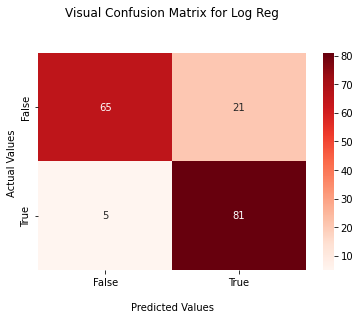

In [ ]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds')

ax.set_title('Visual Confusion Matrix for Log Reg\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
report = classification_report(y_test, y_preds) # NEW
print(report)

              precision    recall  f1-score   support

           0       0.93      0.76      0.83        86
           1       0.79      0.94      0.86        86

    accuracy                           0.85       172
   macro avg       0.86      0.85      0.85       172
weighted avg       0.86      0.85      0.85       172



## CROSS VALS ON sample860

kdnuggets: That is why cross-validation should always be done before over-sampling the data (SMOTE is oversampling) ((860 is undersampling))




In [ ]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)
cv_sample860 = cross_val_score(lr,X,y,cv=kf) #X and y are the 860 splits
print("Cross Validation Scores for sample1k are {}".format(cv_sample860))
print("Average Cross Validation score for sample1k :{}".format(cv_sample860.mean()))

Cross Validation Scores for sample1k are [0.71511628 0.76162791 0.84302326 0.76744186 0.71511628]
Average Cross Validation score for sample1k :0.7604651162790698




---

## STANDARD LOGISTIC REGRESSION ON WHOLE DATASET (7139 ROWS)

In [ ]:
# STARTING WITH A SMALL SET OF CONDITIONS MOSTLY RELATED TO MENTAL HEALTH OR KNOWN PSYCHEDELICS MEDICAL USE (TRAUMA, CHRONIC PAIN, ANXIETY, DEPRESSION, ADDICTION)
Xwh = psych_preEx[['C_DP','C_ANX','C_PN','GAD7_GE10','PHQ9_GE10','MCS12', 'CCI_SCORE', 'KNOWLEDGE', 'C_MI', 'C_INSOM']] #DROPPED BMI AND CCI_SCORE
#NEW Xwh TO INCLUDE ALL PARAMTERS THAT SAMPLE860 INCLUDES - 5 CONDITIONS, ALL SCORES, AND 'HEARD OF'

In [ ]:
ywh = psych_preEx['PSY_USE_YN']

In [ ]:
Xwh_train, Xwh_test, ywh_train, ywh_test = train_test_split(Xwh, ywh, test_size = 0.2, random_state = 222)

In [ ]:
lr_wh = LogisticRegression(solver='lbfgs', random_state=20, max_iter=1000)
lr_wh.fit(Xwh_train, ywh_train)

LogisticRegression(max_iter=1000, random_state=20)

In [ ]:
ywh_preds = lr_wh.predict(Xwh_test)
ywh_preds

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
trainscore_wh= lr_wh.score(Xwh_train,ywh_train)
trainscore_wh

0.9248818070390474

In [ ]:
testscore_wh = lr_wh.score(Xwh_test, ywh_test)
testscore_wh

0.9201680672268907

In [ ]:
cf_matrix_wh = confusion_matrix(ywh_test, ywh_preds)
cf_matrix_wh

array([[1308,   12],
       [ 102,    6]])

In [ ]:
report_wh = classification_report(ywh_test, ywh_preds)
print(report_wh)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1320
           1       0.33      0.06      0.10       108

    accuracy                           0.92      1428
   macro avg       0.63      0.52      0.53      1428
weighted avg       0.88      0.92      0.89      1428



**ACCURACY IS DECEPTIVELY HIGH BECAUSE THE DOMINANT CLASS IS "NO USE" AND THAT IS WHY RECALL AND PRECISION ARE SO LOW**

In [ ]:
accuracy_wh = accuracy_score(ywh_test, ywh_preds).round(2) #sci-kit learn does this for you
precision_wh = precision_score(ywh_test, ywh_preds).round(2) #sci-kit learn does this for you
recall_wh = recall_score(ywh_test, ywh_preds).round(2) #sci-kit learn does this for you
f1_wh = f1_score(ywh_test, ywh_preds).round(2) #sci-kit learn does this for you
fbeta_precision_wh = fbeta_score(ywh_test, ywh_preds, beta=0.5).round(2) # beta value is <1 less than 1 ##not working
fbeta_recall_wh = fbeta_score(ywh_test, ywh_preds, beta=2).round(2) #beta value is >1, greater than 1 ##not working

print('Accuracy score WHOLE: {:.2f}'.format(accuracy_wh))
print('Precision score WHOLE: {:.2f}'.format(precision_wh))
print('Recall score WHOLE: {:.2f}'.format(recall_wh))
print('F1 score WHOLE: {:.2f}'.format(f1_wh))
print('Fbeta score favoring precision WHOLE: {:.2f}'.format(fbeta_precision_wh))
print('FBeta score favoring recall WHOLE: {:.2f}'.format(fbeta_recall_wh))

Accuracy score WHOLE: 0.92
Precision score WHOLE: 0.33
Recall score WHOLE: 0.06
F1 score WHOLE: 0.10
Fbeta score favoring precision WHOLE: 0.17
FBeta score favoring recall WHOLE: 0.07


<font color='red'>NOT DOING CROSS VALIDATION ON THIS MASSIVELY IMBALANCED DATASET</FONT> per https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html



---



---



## DO SMOTE ON pysch_preEx - not sample860



---

**SMOTE**
https://towardsdatascience.com/smote-fdce2f605729


 **precision vs. recall**. <u>Precision means how well a model succeeds in identifying ONLY positive cases</u>.<br>

Recall means how well a model succeeds in identifying ALL the positive cases within the data.

(**P**recision measures ONLY **P**ositive cases. <br>
rec**ALL** measures **ALL** postive cases (id's all positives)

Stratified sampling is a solution to this. Stratified sampling will force the same class balance on the train and test dataset as the original data.


**SMOTE IS SYNTHETIC OVERSAMPLING**

Splits are different with SMOTE. NOt a full x_train, y_train, x_test, y_train kind of split

# THIS IS THE TRAIN/TEST SPLIT OF ENTIRE 7139 ROWS, 30% TO TEST. 

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(psych_preEx, test_size = 0.3, stratify=psych_preEx['PSY_USE_YN'])

In [ ]:
train.shape, test.shape

((4997, 23), (2142, 23))

TRAIN AND TEST BOTH ADD UP TO 7139 - SO IT'S A SPLIT ON THE ENTIRE WHOLE DATA SET

In [ ]:
# train.pivot_table(index='PSY_USE_YN', aggfunc='size').plot(kind='bar', title='Verify that class distribution in train is same as input data')


In [ ]:
# test.pivot_table(index='PSY_USE_YN', aggfunc='size').plot(kind='bar', title='Verify that class distributuion in test is same as input data')

## A LOGISTIC REGRESSION FOR <font color='blue'>SMOTE BENCHMARK</font>

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression with only default settings
my_log_reg = LogisticRegression()

# Fit the logistic regression on the independent variables of the train data with use as dependent variable
my_log_reg.fit(train[['C_DP','C_ANX','C_PN','GAD7_GE10','PHQ9_GE10','MCS12', 'CCI_SCORE', 'KNOWLEDGE', 'C_MI', 'C_INSOM']], train['PSY_USE_YN']) ##THIS IS THE X/Y TRAIN SPLIT

# Make a prediction using our model on the test set
preds = my_log_reg.predict(test[['C_DP','C_ANX','C_PN','GAD7_GE10','PHQ9_GE10','MCS12', 'CCI_SCORE', 'KNOWLEDGE', 'C_MI', 'C_INSOM']]) ## THIS IS X_TEST

In [ ]:
bench_fit_train = my_log_reg.score(train[['C_DP','C_ANX','C_PN','GAD7_GE10','PHQ9_GE10','MCS12', 'CCI_SCORE', 'KNOWLEDGE', 'C_MI', 'C_INSOM']], train['PSY_USE_YN']) 
bench_fit_train

0.9251550930558335

In [ ]:
bench_fit_test = my_log_reg.score(test[['C_DP','C_ANX','C_PN','GAD7_GE10','PHQ9_GE10','MCS12', 'CCI_SCORE', 'KNOWLEDGE', 'C_MI', 'C_INSOM']], test['PSY_USE_YN']) 
bench_fit_test

0.9253034547152195

PERFECT FIT BETWEEN TRAIN AND TEST FOR SMOTE BENCH

---



<font color = 'blue'>**CONFUSION MATRIX BENCHMARK**</font>

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(test['PSY_USE_YN'], preds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

## non visual version. running confusion matrix on Y_TEST and PREDS(which went on X_test)


True negatives:  1979 
False positives:  5 
False negatives:  155 
True Positives:  3


<font color='blue'>**CLASSIFICATION REPORT FOR BENCHMARK**</font>

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test['PSY_USE_YN'], preds))  ## this is Y_TEST again PREDs (which was on X_TEST)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1984
           1       0.38      0.02      0.04       158

    accuracy                           0.93      2142
   macro avg       0.65      0.51      0.50      2142
weighted avg       0.89      0.93      0.89      2142



In [ ]:
#BENCH SCORES
accuracy_bench = accuracy_score(test['PSY_USE_YN'], preds).round(2)
precision_bench = precision_score(test['PSY_USE_YN'], preds).round(2)
recall_bench = recall_score(test['PSY_USE_YN'], preds).round(2)
f1_bench = f1_score(test['PSY_USE_YN'], preds).round(2)
fbeta_precision_bench = fbeta_score(test['PSY_USE_YN'], preds, beta=0.5).round(2)
fbeta_recall_bench = fbeta_score(test['PSY_USE_YN'], preds, beta=2).round(2)
recall_bench

0.02

**CROSS VALS FOR BENCHMARK**

In [ ]:
kf=KFold(n_splits=5)
#score=cross_val_score(my_log_reg,(train[['C_DP','C_ANX','C_PN','GAD7_GE10','PHQ9_GE10','MCS12']]), train['PSY_USE_YN'],cv=kf) ## do i do this on X_wh, y_wh or x_nm, y_nm
bench_cv_score=cross_val_score(my_log_reg,Xwh,ywh,cv=kf) ## do i do this on X_wh, y_wh or x_nm, y_nm

print("Cross Validation Scores are {}".format(bench_cv_score))
print("Average Cross Validation score :{}".format(bench_cv_score.mean()))
xv_bench = bench_cv_score.mean()
xv_bench.round(2)

Cross Validation Scores are [0.90056022 0.99159664 0.99439776 0.95798319 0.71688858]
Average Cross Validation score :0.9122852785122457


0.91

## RANDOM UNDERSAMPLING

done on entire dataset not undersampled 860

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)
# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(Xwh, ywh)

x_rus.shape, y_rus.shape
## this basically did what I did with 500+500 but made it 526+526 for total of 1052

((1052, 10), (1052,))

In [ ]:
#RANDOM UNDER SAMPLE PREDICTIONS 1052
# Instantiate the new Logistic Regression
log_reg_rus = LogisticRegression()

# Fit the model with the data that has been RUS'd
log_reg_rus.fit(x_rus, y_rus) #rus'd full x and y

# Predict on the test set (not resampled to obtain honest evaluation) PREDICT ON ORIGINAL DATA SPLITS (OG X_TEST)
preds_rus = log_reg_rus.predict(test[['C_DP','C_ANX','C_PN','GAD7_GE10','PHQ9_GE10','MCS12', 'CCI_SCORE', 'KNOWLEDGE', 'C_MI', 'C_INSOM']]) ## original "X_test", not ros'd

In [ ]:
rus_fit_train = log_reg_rus.score(train[['C_DP','C_ANX','C_PN','GAD7_GE10','PHQ9_GE10','MCS12', 'CCI_SCORE', 'KNOWLEDGE', 'C_MI', 'C_INSOM']], train['PSY_USE_YN']) 
rus_fit_train

0.7598559135481289

In [ ]:
rus_fit_test = log_reg_rus.score(test[['C_DP','C_ANX','C_PN','GAD7_GE10','PHQ9_GE10','MCS12', 'CCI_SCORE', 'KNOWLEDGE', 'C_MI', 'C_INSOM']], test['PSY_USE_YN']) 
rus_fit_test

0.7796451914098973

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(test['PSY_USE_YN'], preds_rus).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

True negatives:  1540 
False positives:  444 
False negatives:  28 
True Positives:  130


In [ ]:
confusion_matrix_rus = metrics.confusion_matrix(test['PSY_USE_YN'], preds_rus)
confusion_matrix_rus

array([[1540,  444],
       [  28,  130]])

In [ ]:
cm_display_rus = metrics.ConfusionMatrixDisplay(confusion_matrix_rus, display_labels = [False, True])

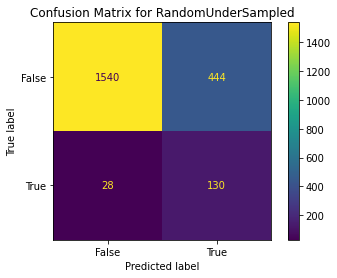

In [ ]:
cm_display_rus.plot()
plt.title("Confusion Matrix for RandomUnderSampled")
plt.show()

In [ ]:
# CLASSIFICATION FOR RUS
print(classification_report(test['PSY_USE_YN'], preds_rus))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      1984
           1       0.23      0.82      0.36       158

    accuracy                           0.78      2142
   macro avg       0.60      0.80      0.61      2142
weighted avg       0.93      0.78      0.83      2142



In [ ]:
##SCORES FOR RUS
accuracy_rus = accuracy_score(test['PSY_USE_YN'], preds_rus).round(2)
precision_rus = precision_score(test['PSY_USE_YN'], preds_rus).round(2)
recall_rus = recall_score(test['PSY_USE_YN'], preds_rus).round(2)
f1_rus = f1_score(test['PSY_USE_YN'], preds_rus).round(2)
fbeta_precision_rus = fbeta_score(test['PSY_USE_YN'], preds_rus, beta=0.5).round(2)
fbeta_recall_rus = fbeta_score(test['PSY_USE_YN'], preds_rus, beta=2).round(2)
f1_rus


0.36

**CROSS VALS FOR RUS**

In [ ]:
kf=KFold(n_splits=5)
rus_cv_score=cross_val_score(log_reg_rus,x_rus, y_rus,cv=kf) 
print("Cross Validation Scores are {}".format(rus_cv_score))
print("Average Cross Validation score :{}".format(rus_cv_score.mean()))
xv_rus = rus_cv_score.mean().round(2)
xv_rus

Cross Validation Scores are [0.63507109 0.67772512 0.80952381 0.64285714 0.5952381 ]
Average Cross Validation score :0.6720830512299706


0.67

## RANDOM OVERSAMPLING
generate new samples by randomly sampling with replacement of the currently available samples

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(Xwh,ywh)

x_ros.shape, y_ros.shape
## THIS GENERATES A TON OF DATA ROWS - 13k IS WAY MORE THAN 1k

((13226, 10), (13226,))

In [ ]:
#RANDOMOVERSAMPLE PREDICTIONS 13226
# Instantiate the new Logistic Regression
log_reg_ros = LogisticRegression()

# Fit the model with the data that has been TOMEKD
log_reg_ros.fit(x_ros, y_ros) #ros'd full x and y
# fit the Logistic REgression to the ros'd X and Y

#train, test = train_test_split(psych_preEx, test_size = 0.3, stratify=psych_preEx['PSY_USE_YN']) TRAIN is STRATIFYED

# Predict on the test set (not resampled to obtain honest evaluation) PREDICT ON ORIGINAL DATA SPLITS (OG X_TEST)
preds_ros = log_reg_ros.predict(test[['C_DP','C_ANX','C_PN','GAD7_GE10','PHQ9_GE10','MCS12', 'CCI_SCORE', 'KNOWLEDGE', 'C_MI', 'C_INSOM']]) ## original "X_test", not ros'd - 30%


In [ ]:
ros_fit_train = log_reg_ros.score(train[['C_DP','C_ANX','C_PN','GAD7_GE10','PHQ9_GE10','MCS12', 'CCI_SCORE', 'KNOWLEDGE', 'C_MI', 'C_INSOM']], train['PSY_USE_YN']) 
ros_fit_train

0.7504502701620973

In [ ]:
ros_fit_test= log_reg_ros.score(test[['C_DP','C_ANX','C_PN','GAD7_GE10','PHQ9_GE10','MCS12', 'CCI_SCORE', 'KNOWLEDGE', 'C_MI', 'C_INSOM']], test['PSY_USE_YN']) 
ros_fit_test

0.761437908496732

In [ ]:
preds_ros.shape

(2142,)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(test['PSY_USE_YN'], preds_ros).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

True negatives:  1499 
False positives:  485 
False negatives:  26 
True Positives:  132


In [ ]:
confusion_matrix_ros = metrics.confusion_matrix(test['PSY_USE_YN'], preds_ros)
confusion_matrix_ros

array([[1499,  485],
       [  26,  132]])

In [ ]:
cm_display_ros = metrics.ConfusionMatrixDisplay(confusion_matrix_ros, display_labels = [False, True])

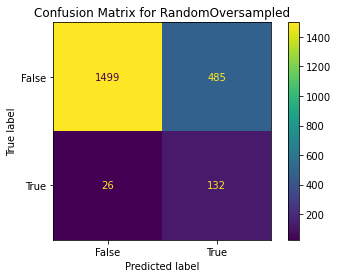

In [ ]:
cm_display_ros.plot()
plt.title("Confusion Matrix for RandomOversampled")
plt.show()

In [ ]:
# CLASSIFICATION FOR ROS
print(classification_report(test['PSY_USE_YN'], preds_ros))

              precision    recall  f1-score   support

           0       0.98      0.76      0.85      1984
           1       0.21      0.84      0.34       158

    accuracy                           0.76      2142
   macro avg       0.60      0.80      0.60      2142
weighted avg       0.93      0.76      0.82      2142



**CROSS VALS FOR ROS**

In [ ]:
kf=KFold(n_splits=5)
xv_ros_score=cross_val_score(log_reg_ros,x_ros, y_ros,cv=kf) ## do i do this on X_wh, y_wh or x_nm, y_nm
print("Cross Validation Scores are {}".format(xv_ros_score))
print("Average Cross Validation score :{}".format(xv_ros_score.mean()))

Cross Validation Scores are [0.58390023 0.71190926 0.82306238 0.67448015 0.67145558]
Average Cross Validation score :0.6929615198316251


In [ ]:
##SCORES FOR ROS
accuracy_ros = accuracy_score(test['PSY_USE_YN'], preds_ros).round(2)
precision_ros = precision_score(test['PSY_USE_YN'], preds_ros).round(2)
recall_ros = recall_score(test['PSY_USE_YN'], preds_ros).round(2)
f1_ros = f1_score(test['PSY_USE_YN'], preds_ros).round(2)
fbeta_precision_ros = fbeta_score(test['PSY_USE_YN'], preds_ros, beta=0.5).round(2)
fbeta_recall_ros = fbeta_score(test['PSY_USE_YN'], preds_ros, beta=2).round(2)
xv_ros = xv_ros_score.mean().round(2)
f1_ros, xv_ros

(0.34, 0.69)

## TOMEKS LINKS
remove paired neighbors

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = RandomOverSampler(sampling_strategy='majority')

# fit predictor and target variable
x_tl, y_tl = ros.fit_resample(Xwh, ywh)

x_tl.shape, y_tl.shape

## ALSO CREATES A LOT MORE ROWS - 13K, NOT 1K

((13226, 10), (13226,))

In [ ]:
#TOMEKS PREDICTIONS 13226
# Instantiate the new Logistic Regression
log_reg_tomeks = LogisticRegression()

# Fit the model with the data that has been TOMEKD
log_reg_tomeks.fit(x_tl, y_tl) #tomek'd full x and y
# fit the Logistic REgression to the tomek'd X and Y

#train, test = train_test_split(psych_preEx, test_size = 0.3, stratify=psych_preEx['PSY_USE_YN']) TRAIN is STRATIFYED

# Predict on the test set (not resampled to obtain honest evaluation) PREDICT ON ORIGINAL DATA SPLITS (OG X_TEST)
preds_tomeks = log_reg_tomeks.predict(test[['C_DP','C_ANX','C_PN','GAD7_GE10','PHQ9_GE10','MCS12', 'CCI_SCORE', 'KNOWLEDGE', 'C_MI', 'C_INSOM']]) ## original "X_test", not tomek'd

In [ ]:
tomeks_fit_train = log_reg_tomeks.score(train[['C_DP','C_ANX','C_PN','GAD7_GE10','PHQ9_GE10','MCS12', 'CCI_SCORE', 'KNOWLEDGE', 'C_MI', 'C_INSOM']], train['PSY_USE_YN']) 
tomeks_fit_train

0.7504502701620973

In [ ]:
tomeks_fit_test = log_reg_tomeks.score(test[['C_DP','C_ANX','C_PN','GAD7_GE10','PHQ9_GE10','MCS12', 'CCI_SCORE', 'KNOWLEDGE', 'C_MI', 'C_INSOM']], test['PSY_USE_YN']) 
tomeks_fit_test

0.761437908496732

In [ ]:
preds_tomeks.shape

(2142,)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(test['PSY_USE_YN'], preds_tomeks).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

True negatives:  1499 
False positives:  485 
False negatives:  26 
True Positives:  132


In [ ]:
confusion_matrix_tomeks = metrics.confusion_matrix(test['PSY_USE_YN'], preds_tomeks)
confusion_matrix_tomeks

array([[1499,  485],
       [  26,  132]])

In [ ]:
cm_display_tomeks = metrics.ConfusionMatrixDisplay(confusion_matrix_tomeks, display_labels = [False, True])

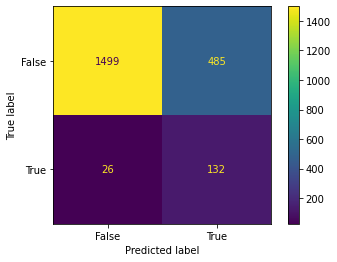

In [ ]:
cm_display_tomeks.plot()
plt.show()

In [ ]:
# CLASSIFICATION FOR TOMEKS
print(classification_report(test['PSY_USE_YN'], preds_tomeks))

              precision    recall  f1-score   support

           0       0.98      0.76      0.85      1984
           1       0.21      0.84      0.34       158

    accuracy                           0.76      2142
   macro avg       0.60      0.80      0.60      2142
weighted avg       0.93      0.76      0.82      2142



**CROSS VALS FOR TOMEKS**

In [ ]:
kf=KFold(n_splits=5)
xv_tomeks_score=cross_val_score(log_reg_tomeks,x_tl, y_tl,cv=kf) ## do i do this on X_wh, y_wh or x_nm, y_nm
print("Cross Validation Scores are {}".format(xv_tomeks_score))
print("Average Cross Validation score :{}".format(xv_tomeks_score.mean()))

Cross Validation Scores are [0.58390023 0.71190926 0.82306238 0.67448015 0.67145558]
Average Cross Validation score :0.6929615198316251


In [ ]:
##SCORES FOR TOMEKS
accuracy_tomeks = accuracy_score(test['PSY_USE_YN'], preds_tomeks).round(2)
precision_tomeks = precision_score(test['PSY_USE_YN'], preds_tomeks).round(2)
recall_tomeks = recall_score(test['PSY_USE_YN'], preds_tomeks).round(2)
f1_tomeks = f1_score(test['PSY_USE_YN'], preds_tomeks).round(2)
fbeta_precision_tomeks = fbeta_score(test['PSY_USE_YN'], preds_tomeks, beta=0.5).round(2)
fbeta_recall_tomeks = fbeta_score(test['PSY_USE_YN'], preds_tomeks, beta=2).round(2)
xv_tomeks = xv_tomeks_score.mean().round(2)
recall_tomeks, xv_tomeks

(0.84, 0.69)

## NEARMISS
NearMiss is an under-sampling technique. Instead of resampling the Minority class, using a distance, this will make the majority class equal to the minority class.

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
x_nm, y_nm = nm.fit_resample(Xwh, ywh)

x_nm.shape, y_nm.shape
##LIKE UNDERSAMPLE AND sample1k = 1052 ROWS

((1052, 10), (1052,))

In [ ]:
#NEARMISS PREDICTIONS 1052
# Instantiate the new Logistic Regression
log_reg_nearmiss = LogisticRegression()

# Fit the model with the data that has been TOMEKD
log_reg_nearmiss.fit(x_nm, y_nm) #nearmiss'd full x and y
# fit the Logistic REgression to the nearmiss'd X and Y

#train, test = train_test_split(psych_preEx, test_size = 0.3, stratify=psych_preEx['PSY_USE_YN']) TRAIN is STRATIFYED

# Predict on the test set (not resampled to obtain honest evaluation) PREDICT ON ORIGINAL DATA SPLITS (OG X_TEST)
preds_nearmiss = log_reg_nearmiss.predict(test[['C_DP','C_ANX','C_PN','GAD7_GE10','PHQ9_GE10','MCS12', 'CCI_SCORE', 'KNOWLEDGE', 'C_MI', 'C_INSOM']]) ## original "X_test", not tomek'd

In [ ]:
nm_fit_train = log_reg_nearmiss.score(train[['C_DP','C_ANX','C_PN','GAD7_GE10','PHQ9_GE10','MCS12', 'CCI_SCORE', 'KNOWLEDGE', 'C_MI', 'C_INSOM']], train['PSY_USE_YN']) 
nm_fit_train

0.6153692215329197

In [ ]:
nm_fit_test = log_reg_nearmiss.score(test[['C_DP','C_ANX','C_PN','GAD7_GE10','PHQ9_GE10','MCS12', 'CCI_SCORE', 'KNOWLEDGE', 'C_MI', 'C_INSOM']], test['PSY_USE_YN']) 
nm_fit_test

0.630718954248366

In [ ]:
preds_nearmiss.shape

(2142,)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(test['PSY_USE_YN'], preds_nearmiss).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

True negatives:  1236 
False positives:  748 
False negatives:  43 
True Positives:  115


In [ ]:
confusion_matrix_nm = metrics.confusion_matrix(test['PSY_USE_YN'], preds_nearmiss)
confusion_matrix_nm

array([[1236,  748],
       [  43,  115]])

In [ ]:
cm_display_nm = metrics.ConfusionMatrixDisplay(confusion_matrix_nm, display_labels = [False, True])

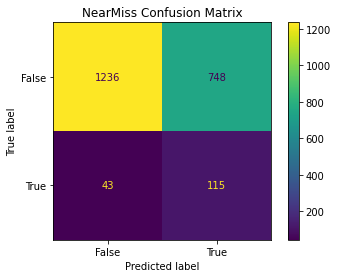

In [ ]:
cm_display_nm.plot()
plt.title("NearMiss Confusion Matrix")
plt.show()

In [ ]:
# CLASSIFICATION FOR NEARMISS
print(classification_report(test['PSY_USE_YN'], preds_nearmiss))

              precision    recall  f1-score   support

           0       0.97      0.62      0.76      1984
           1       0.13      0.73      0.23       158

    accuracy                           0.63      2142
   macro avg       0.55      0.68      0.49      2142
weighted avg       0.90      0.63      0.72      2142



**CROSS VALS FOR NEAR MISS**

In [ ]:
kf=KFold(n_splits=5)
xv_nm_score=cross_val_score(log_reg_nearmiss,x_nm, y_nm,cv=kf)
print("Cross Validation Scores are {}".format(xv_nm_score))
print("Average Cross Validation score :{}".format(xv_nm_score.mean()))

Cross Validation Scores are [0.76303318 0.78199052 0.73809524 0.57142857 0.4952381 ]
Average Cross Validation score :0.6699571202888738


In [ ]:
##SCORES FOR NEARMISS
accuracy_nm = accuracy_score(test['PSY_USE_YN'], preds_nearmiss).round(2)
precision_nm = precision_score(test['PSY_USE_YN'], preds_nearmiss).round(2)
recall_nm = recall_score(test['PSY_USE_YN'], preds_nearmiss).round(2)
f1_nm = f1_score(test['PSY_USE_YN'], preds_nearmiss).round(2)
fbeta_precision_nm = fbeta_score(test['PSY_USE_YN'], preds_nearmiss, beta=0.5).round(2)
fbeta_recall_nm = fbeta_score(test['PSY_USE_YN'], preds_nearmiss, beta=2).round(2)
xv_nm = xv_nm_score.mean().round(2)
recall_nm, xv_nm

(0.73, 0.67)

[analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/](https://)

Accuracy is not the best metric to use when evaluating imbalanced datasets as it can be misleading.

Metrics that can provide better insight are:

* Confusion Matrix: a table showing correct predictions and types of incorrect predictions.
* Precision: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.
* Recall: the number of true positives divided by the number of positive values in the test data. The recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.
* F1: Score: the weighted average of precision and recall.
* Area Under ROC Curve (AUROC): AUROC represents the likelihood of your model distinguishing observations from two classes.

In other words, if you randomly select one observation from each class, what’s the probability that your model will be able to “rank” them correctly?



---

## THE SMOTE BUILD
synthetic over-sampling<br>
kd nuggets:
**2.2. Over-sampling**
On the contrary, oversampling is used when the quantity of data is insufficient. It tries to balance dataset by increasing the size of rare samples. Rather than getting rid of abundant samples, new rare samples are generated by using e.g. repetition, bootstrapping or SMOTE (Synthetic Minority Over-Sampling Technique) [1].

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#CREATING SMOTED DATA SPLITS - SMOTES DONT WORK ON SPLITS LIKE OTHER ALGOS DO. IT WORKS ON WHOLE SET
X_resampled, y_resampled = SMOTE().fit_resample(train[['C_DP','C_ANX','C_PN','GAD7_GE10','PHQ9_GE10','MCS12', 'CCI_SCORE', 'KNOWLEDGE', 'C_MI', 'C_INSOM']], train['PSY_USE_YN']) ##this is X,y

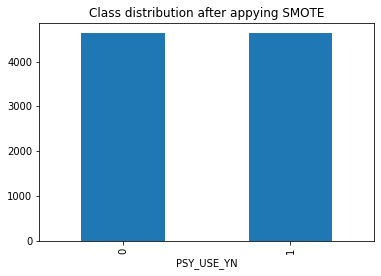

In [ ]:
#VERIFY REPAIR OF CLASS IMBALANCE
pd.Series(y_resampled).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='PSY_USE_YN')


In [ ]:
# Instantiate the new Logistic Regression
log_reg_smote = LogisticRegression()

# Fit the model with the data that has been resampled with SMOTE
log_reg_smote.fit(X_resampled, y_resampled) ##smoted X and y 
# fit the Logistic REgression to the SMOTED DATA SPLITS

# Predict on the test set (not resampled to obtain honest evaluation) PREDICT ON ORIGINAL DATA SPLITS (OG X_TEST)
preds2 = log_reg_smote.predict(test[['C_DP','C_ANX','C_PN','GAD7_GE10','PHQ9_GE10','MCS12', 'CCI_SCORE', 'KNOWLEDGE', 'C_MI', 'C_INSOM']]) ## original "X_test", not smoted



In [ ]:
smote_fit_train = log_reg_smote.score(train[['C_DP','C_ANX','C_PN','GAD7_GE10','PHQ9_GE10','MCS12', 'CCI_SCORE', 'KNOWLEDGE', 'C_MI', 'C_INSOM']], train['PSY_USE_YN']) 
smote_fit_train

0.7622573544126476

In [ ]:
smote_fit_test = log_reg_smote.score(test[['C_DP','C_ANX','C_PN','GAD7_GE10','PHQ9_GE10','MCS12', 'CCI_SCORE', 'KNOWLEDGE', 'C_MI', 'C_INSOM']], test['PSY_USE_YN']) 
smote_fit_test

0.7749766573295985

In [ ]:
preds2.shape

(2142,)

In [ ]:
#SMOTED DATA
tn, fp, fn, tp = confusion_matrix(test['PSY_USE_YN'], preds2).ravel() #original y_test and preds2 - LogReg fitted to resampled Splits, predicting on unsmoted
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

True negatives:  1532 
False positives:  452 
False negatives:  30 
True positives:  128


In [ ]:
smoteconfusion = confusion_matrix(test['PSY_USE_YN'], preds2)
print(smoteconfusion)

[[1532  452]
 [  30  128]]


In [ ]:
#BENCHMARK DATA 
tn, fp, fn, tp = confusion_matrix(test['PSY_USE_YN'], preds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

True negatives:  1979 
False positives:  5 
False negatives:  155 
True Positives:  3


In [ ]:
benchconfusion = confusion_matrix(test['PSY_USE_YN'], preds)
print(benchconfusion)

## LOOK HERE... THE X IS TEST['PSY'] AND THE Y IS PREDS!

[[1979    5]
 [ 155    3]]


* TRUE NEGS WENT <font color='red'>DOWN</font> 
* FALSE POS WENT <font color='blue'>UP</font> 
* FALSE NEGS WENT <font color='red'>DOWN </font>
* TRU POS WENT <font color='blue'>UP</font>

In [ ]:
confusion_matrix_bench = metrics.confusion_matrix(test['PSY_USE_YN'], preds)
confusion_matrix_bench

array([[1979,    5],
       [ 155,    3]])

In [ ]:
cm_display_bench = metrics.ConfusionMatrixDisplay(confusion_matrix_bench, display_labels = [False, True])

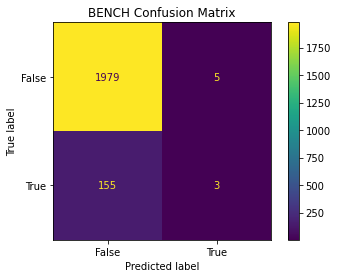

In [ ]:
cm_display_bench.plot()
plt.title("BENCH Confusion Matrix")
plt.show()

In [ ]:
# ax = sns.heatmap(benchconfusion, annot=True, cmap='Greens', fmt=".0f")

# ax.set_title('Visual Confusion Matrix for BENCH\n\n');
# ax.set_ylabel('\nACTUAL  - AS IN X_TEST') 
# ax.set_xlabel('PREDICTIONS Values ');

# # Ticket labels - List must be in alphabetical order
# # ax.xaxis.set_ticklabels(['False','True'])
# # ax.yaxis.set_ticklabels(['False','True'])

In [ ]:
cm_display_smote = metrics.ConfusionMatrixDisplay(smoteconfusion, display_labels = [False, True])

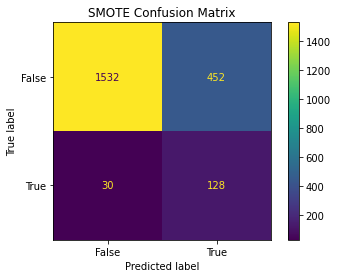

In [ ]:
cm_display_smote.plot()
plt.title("SMOTE Confusion Matrix")
plt.show()

In [ ]:
# import seaborn as sns

# ax = sns.heatmap(smoteconfusion, annot=True, cmap='Blues', fmt=".0f")

# ax.set_title('Visual Confusion Matrix for SMOTE\n\n');
# ax.set_xlabel('Actual Values '); #actual on X LG switched this
# ax.set_ylabel('\nPredicted Values') #Y IS PREDS TO MATCH SMOTECONFUSION OBJECT SET UP


# ## Ticket labels - List must be in alphabetical order
# ax.xaxis.set_ticklabels(['False USE','True NONUSE'])
# ax.yaxis.set_ticklabels(['False USE NEG','True NONUSE POZ'])

In [ ]:
#SMOTED DATA
tn, fp, fn, tp = confusion_matrix(test['PSY_USE_YN'], preds2).ravel() 
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

True negatives:  1532 
False positives:  452 
False negatives:  30 
True positives:  128


**SMOTE CROSS VAL**
remember to keep cross vals on *entire* dataset

In [ ]:
kf=KFold(n_splits=5)
xv_smote_score=cross_val_score(log_reg_smote,X_resampled,y_resampled,cv=kf)
print("Cross Validation Scores are {}".format(xv_smote_score))
print("Average Cross Validation score :{}".format(xv_smote_score.mean()))

Cross Validation Scores are [0.72030238 0.71436285 0.77267819 0.69746083 0.68287412]
Average Cross Validation score :0.7175356733211748


In [ ]:
##SCORES FOR SMOTE
accuracy_smote = accuracy_score(test['PSY_USE_YN'], preds2).round(2) #sci-kit learn does this for you
precision_smote = precision_score(test['PSY_USE_YN'], preds2).round(2) #sci-kit learn does this for you
recall_smote = recall_score(test['PSY_USE_YN'], preds2).round(2) #sci-kit learn does this for you
f1_smote = f1_score(test['PSY_USE_YN'], preds2).round(2) #sci-kit learn does this for you
fbeta_precision_smote = fbeta_score(test['PSY_USE_YN'], preds2, beta=0.5).round(2) # beta value is <1 less than 1 ##not working
fbeta_recall_smote = fbeta_score(test['PSY_USE_YN'], preds2, beta=2).round(2) #beta value is >1, greater than 1 ##not working
xv_smote = xv_smote_score.mean().round(2)
recall_smote, xv_smote

(0.81, 0.72)

In [ ]:
print("THIS IS SMOTED")
print(classification_report(test['PSY_USE_YN'], preds2)) # origital y_test and preds2


THIS IS SMOTED
              precision    recall  f1-score   support

           0       0.98      0.77      0.86      1984
           1       0.22      0.81      0.35       158

    accuracy                           0.77      2142
   macro avg       0.60      0.79      0.61      2142
weighted avg       0.92      0.77      0.83      2142



In [ ]:
print("THIS IS sample860")
report = classification_report(y_test, y_preds) # NEW2
print(report)


THIS IS sample860
              precision    recall  f1-score   support

           0       0.93      0.76      0.83        86
           1       0.79      0.94      0.86        86

    accuracy                           0.85       172
   macro avg       0.86      0.85      0.85       172
weighted avg       0.86      0.85      0.85       172



* SMOTE PRECISION WENT DOWN FROM SAMPLE860
* SMOTE RECALL WENT DOWN FROM SAMPLE860
* SMOTE F1 WENT DOWN FROM SAMPLE860
* ACCURACY of SMOTE: 76 **not a good metric to consider with resampled data
* ACCURACY of SAMPLE860: 88



In [ ]:
from sklearn.metrics import classification_report
print("THIS IS BENCHMARK ON BEFORE SMOTE")
print(classification_report(test['PSY_USE_YN'], preds))  ## this is Y_TEST again PREDs (which was on X_TEST)

THIS IS BENCHMARK ON BEFORE SMOTE
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1984
           1       0.38      0.02      0.04       158

    accuracy                           0.93      2142
   macro avg       0.65      0.51      0.50      2142
weighted avg       0.89      0.93      0.89      2142



## PENALIZED SVM



---
A popular algorithm for this technique is **Penalized-SVM**.

During training, we can use the argument class_weight=’balanced’ to **penalize mistakes on the minority class by an amount proportional to how under-represented it is**.

We also want to include the argument probability=True if we want to enable probability estimates for SVM algorithms.

Let’s train a model using Penalized-SVM on the **original imbalanced dataset**

https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/?


In [ ]:
from sklearn.svm import SVC

# we can add class_weight='balanced' to add penalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(Xwh_train, ywh_train)

svc_predict = svc_model.predict(Xwh_test)# check performance
print('ROCAUC score:',roc_auc_score(ywh_test, svc_predict))
print('Accuracy score:',accuracy_score(ywh_test, svc_predict))
print('F1 score:',f1_score(ywh_test, svc_predict))

ROCAUC score: 0.773989898989899
Accuracy score: 0.7471988795518207
F1 score: 0.3252336448598131


In [ ]:
svc_predict

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
svc_fit_train = svc_model.score(train[['C_DP','C_ANX','C_PN','GAD7_GE10','PHQ9_GE10','MCS12', 'CCI_SCORE', 'KNOWLEDGE', 'C_MI', 'C_INSOM']], train['PSY_USE_YN']) 
svc_fit_train

0.762657594556734

In [ ]:
svc_fit_test = svc_model.score(test[['C_DP','C_ANX','C_PN','GAD7_GE10','PHQ9_GE10','MCS12', 'CCI_SCORE', 'KNOWLEDGE', 'C_MI', 'C_INSOM']], test['PSY_USE_YN']) 
svc_fit_test

0.7661064425770309

In [ ]:
svc_predict.shape

(1428,)

In [ ]:
# CLASSIFICATION FOR SVC PENALIZED
print(classification_report(ywh_test, svc_predict))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84      1320
           1       0.20      0.81      0.33       108

    accuracy                           0.75      1428
   macro avg       0.59      0.77      0.58      1428
weighted avg       0.92      0.75      0.81      1428



**CROSS VALS FOR SVC** 

In [ ]:
kf=KFold(n_splits=5)
xv_smv_score=cross_val_score(svc_model,Xwh,ywh,cv=kf)
print("Cross Validation Scores are {}".format(xv_smv_score))
print("Average Cross Validation score :{}".format(xv_smv_score.mean()))

Cross Validation Scores are [0.60504202 0.76960784 0.82633053 0.63165266 0.83461808]
Average Cross Validation score :0.733450226621833


In [ ]:
#SCORES FOR SVM
accuracy_svm = accuracy_score(ywh_test, svc_predict).round(2) #sci-kit learn does this for you
precision_svm= precision_score(ywh_test, svc_predict).round(2) #sci-kit learn does this for you
recall_svm = recall_score(ywh_test, svc_predict).round(2) #sci-kit learn does this for you
f1_svm = f1_score(ywh_test, svc_predict).round(2) #sci-kit learn does this for you
fbeta_precision_svm = fbeta_score(ywh_test, svc_predict, beta=0.5).round(2) # beta value is <1 less than 1 ##not working
fbeta_recall_svm= fbeta_score(ywh_test, svc_predict, beta=2).round(2) #beta value is >1, greater than 1 ##not working
xv_smv = xv_smv_score.mean().round(2)
recall_svm, xv_smv_score.mean().round(2)


(0.81, 0.73)

##<font color = 'blue'>**RECAP**<br>
<font color = 'blue'>So at this point - I have done these things:</font>
* found data
* cleaned / EDA / Feature Engineering
* decided to use only MH features 


<font color = 'blue'>Ran Logistic Regressions on these sets: 
* full data set (no cross_val, too imbalanced)
* created RANDOM manual undersampled dataset with 1000 rows (500 users, 500 nonusers) "sample1k"
* created sample860 after removing "no response" for Knowledge (430 heard of and 430 not-heard-of)



<font color = 'blue'>Did LogReg for imbalanced datasets with these resampling techniques:
* SMOTE
* RandomOverSampled
* RandomUnderSampled
* NearMiss
* Tomeks
* SMOTE benchmark

<font color = 'blue'>Ran these other algorithms: </font>
* Penalized SVC (per a website)
* Random Forest
* KNN




---



---



---



**BELOW IS EASIER RANDOM SAMPLE GENERATION & SPLITS FOR RANDOM FOREST AND KNN**

In [ ]:
sample430 = psych_preEx[(psych_preEx['PSY_USE_YN'] ==1)& (psych_preEx['KNOWLEDGE'] != 0.5)].sample(n=430)

In [ ]:
samplenon430 = psych_preEx[(psych_preEx['PSY_USE_YN'] ==0) & (psych_preEx['KNOWLEDGE'] != 0.5)].sample(n=430)

In [ ]:
samplecombo =[sample430, samplenon430]

In [ ]:
sample860 = pd.concat(samplecombo)
#sample1k

In [ ]:
X = sample860[['C_DP','C_ANX','C_PN','GAD7_GE10','PHQ9_GE10','MCS12', 'CCI_SCORE', 
              'KNOWLEDGE', 'C_MI', 'C_INSOM']] #DROPPED BMI, + MIGRAINE, +IMSOM, +OTHER PCP, + KNOWN USE MH, dropped 'RU_OTPCP_YN', dropped 'C_TOTAL',

In [ ]:
y = sample860['PSY_USE_YN']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 222)

## RANDOM FOREST - JUST BECAUSE

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=25, oob_score=True)

In [ ]:
classifier_rf.fit(X_train, y_train) #from sample860

RandomForestClassifier(max_depth=5, n_estimators=25, n_jobs=-1, oob_score=True,
                       random_state=42)

In [ ]:
classifier_rf.oob_score_

0.8343023255813954

**WHAT IS THIS OOB SCORE AND WHY IS IT SIGNIFICANT?**

RANDOM FOREST FOR SAMPLE860 'X' 


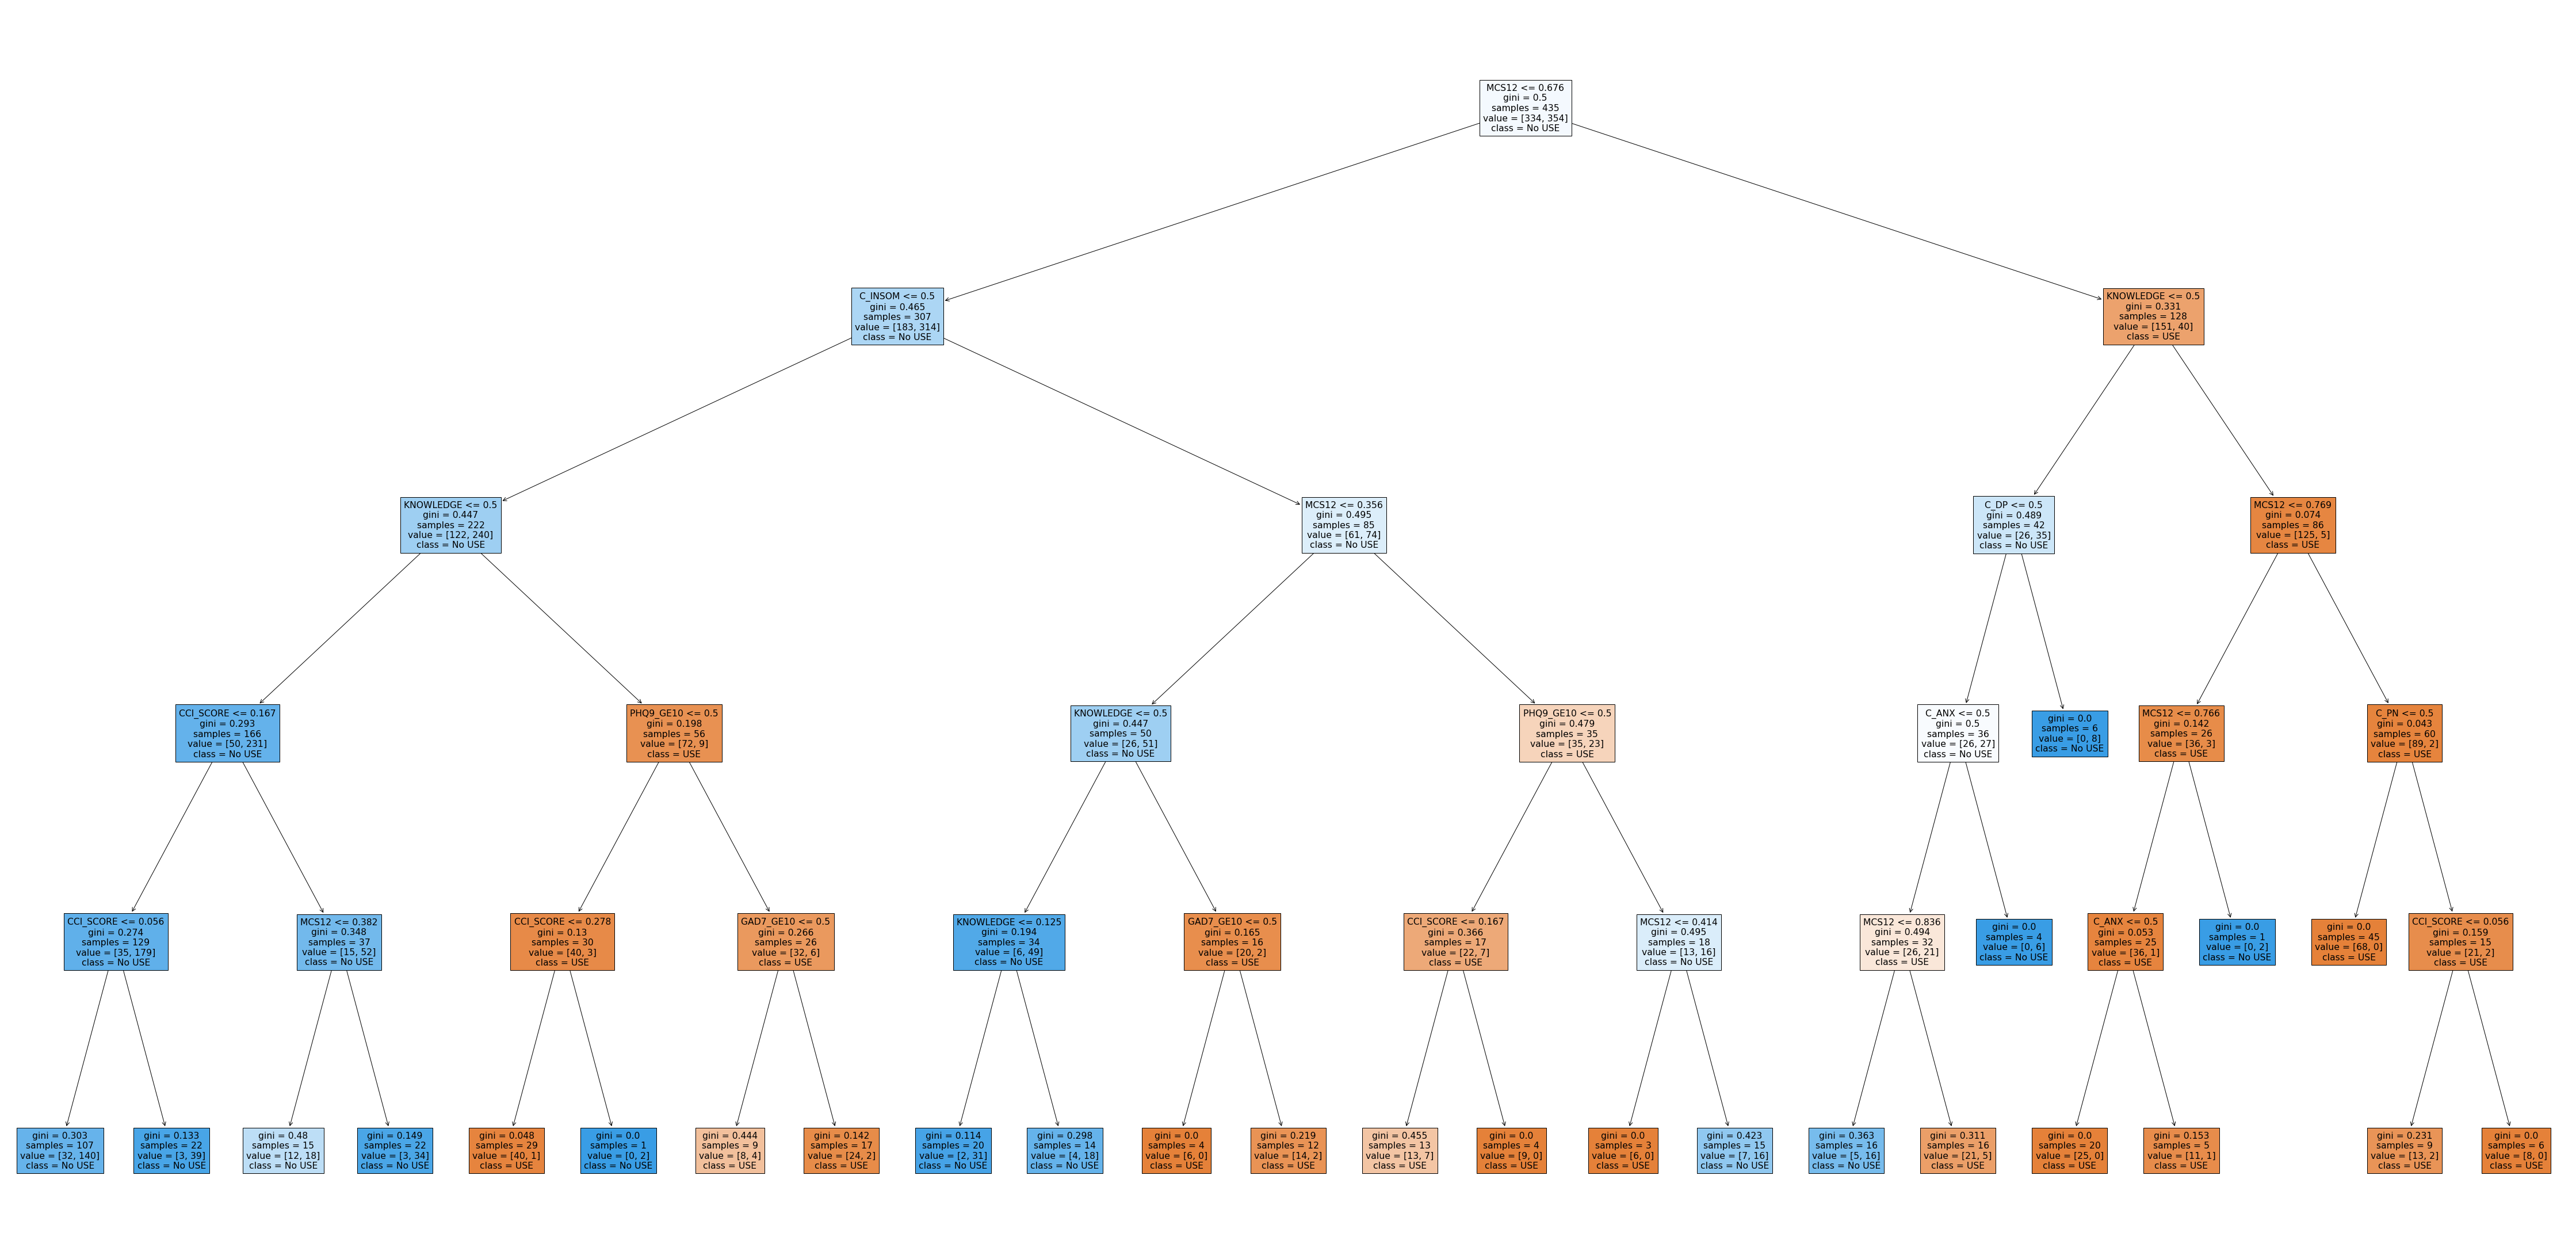

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(classifier_rf.estimators_[5], feature_names = X.columns,class_names=['USE', "No USE"],filled=True);
print("RANDOM FOREST FOR SAMPLE860 'X' ")

**PREDICTIONS FOR RANDOM FOREST**

In [ ]:
preds_rf = classifier_rf.predict(X_test)
preds_rf

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1])

**SCORES FOR RAND FOREST**

In [ ]:
acc_rf_score = classifier_rf.score(X_test, y_test)
acc_rf_score

0.8313953488372093

In [ ]:
# CLASSIFICATION FOR RF
print(classification_report(y_test, preds_rf))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82        86
           1       0.80      0.88      0.84        86

    accuracy                           0.83       172
   macro avg       0.84      0.83      0.83       172
weighted avg       0.84      0.83      0.83       172



**CROSS VALS FOR RANDOM FOREST**

In [ ]:
#CROSS VAL FOR RANDOM FOREST
kf=KFold(n_splits=5)
xv_rf = cross_val_score(classifier_rf,X,y,cv=kf) #X and y are the 860 splits
print("Cross Validation Scores for sample1k are {}".format(xv_rf))
print("Average Cross Validation score for sample1k :{}".format(xv_rf.mean()))
xv_rf_score = xv_rf.mean()

Cross Validation Scores for sample1k are [0.84883721 0.83139535 0.8255814  0.75       0.74418605]
Average Cross Validation score for sample1k :0.8


In [ ]:
accuracy_rf = accuracy_score(y_test, preds_rf).round(2) #sci-kit learn does this for you
precision_rf = precision_score(y_test, preds_rf).round(2) #sci-kit learn does this for you
recall_rf = recall_score(y_test, preds_rf).round(2) #sci-kit learn does this for you
f1_rf = f1_score(y_test, preds_rf).round(2) #sci-kit learn does this for you
fbeta_precision_rf = fbeta_score(y_test, preds_rf, beta=0.5).round(2) # beta value is <1 less than 1 ##not working
fbeta_recall_rf = fbeta_score(y_test, preds_rf, beta=2).round(2) #beta value is >1, greater than 1 ##not working
recall_rf, xv_rf.mean().round(2)

(0.88, 0.8)

**FEATURE IMPORTANCE**

In [ ]:
# FEATURE IMPORTANCE**

classifier_rf.feature_importances_

array([0.02475518, 0.02714573, 0.00587361, 0.02171442, 0.07077973,
       0.14426548, 0.02057777, 0.65738898, 0.01641357, 0.01108554])

In [ ]:
imp_df = pd.DataFrame({
    "Feature/Condition": X_train.columns,
    "Importance": classifier_rf.feature_importances_
})

In [ ]:
imp_df.sort_values(by="Importance", ascending=False)

,Feature/Condition,Importance
7,KNOWLEDGE,0.657389
5,MCS12,0.144265
4,PHQ9_GE10,0.070780
1,C_ANX,0.027146
0,C_DP,0.024755
3,GAD7_GE10,0.021714
6,CCI_SCORE,0.020578
8,C_MI,0.016414
9,C_INSOM,0.011086
2,C_PN,0.005874




---



---



---



## KNN CLASSIFIER


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Split into training and test set
Xknn_train, Xknn_test, yknn_train, yknn_test = train_test_split(X, y, test_size = 0.2, random_state=42) #pulling this from sample860
  
knn = KNeighborsClassifier(n_neighbors=7) 
#knn = KNeighborsClassifier(n_neighbors= 7, algorithm = 'auto', weights='distance') #adjust neighbors, weight, algorithm: brute, kd_tree, ball_tree, auto
#knn = KNeighborsClassifier(n_neighbors=10) #adjust neighbors, weight
#knn = KNeighborsClassifier(n_neighbors=2) #adjust neighbors, weight 
  
knn.fit(Xknn_train, yknn_train)
  
# Predict on dataset which model has not seen before
knn_preds = knn.predict(Xknn_test)
knn_preds

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
train_accuracy_knn = knn.score(Xknn_train, yknn_train)
test_accuracy_knn = knn.score(Xknn_test, yknn_test)
train_accuracy_knn, test_accuracy_knn

(0.8372093023255814, 0.7674418604651163)

In [ ]:
# Calculate the accuracy of the model
print("KNN accuracy score: ", knn.score(Xknn_test, yknn_test))
knn_score = knn.score(Xknn_test, yknn_test)

KNN accuracy score:  0.7674418604651163


In [ ]:
cm_knn = confusion_matrix(yknn_test, knn_preds)
cm_knn

array([[60, 28],
       [12, 72]])

In [ ]:
# CLASSIFICATION FOR KNN
print(classification_report(yknn_test, knn_preds))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75        88
           1       0.72      0.86      0.78        84

    accuracy                           0.77       172
   macro avg       0.78      0.77      0.77       172
weighted avg       0.78      0.77      0.77       172



**CROSS VAL ON KNN**

In [ ]:
kf=KFold(n_splits=5)
xv_knn= cross_val_score(knn,X,y,cv=kf) #X and y are the 860 splits
print("Cross Validation Scores for sample1k are {}".format(xv_knn))
print("Average Cross Validation score for sample1k :{}".format(xv_knn.mean()))
knn_cv_mean = xv_knn.mean().round(2)

Cross Validation Scores for sample1k are [0.74418605 0.6627907  0.80232558 0.61627907 0.62209302]
Average Cross Validation score for sample1k :0.6895348837209301


In [ ]:
accuracy_knn = accuracy_score(yknn_test, knn_preds).round(2) #sci-kit learn does this for you
precision_knn = precision_score(yknn_test, knn_preds).round(2) #sci-kit learn does this for you
recall_knn = recall_score(yknn_test, knn_preds).round(2) #sci-kit learn does this for you
f1_knn = f1_score(yknn_test, knn_preds).round(2) #sci-kit learn does this for you
fbeta_precision_knn = fbeta_score(yknn_test, knn_preds, beta=0.5).round(2) # beta value is <1 less than 1 ##not working
fbeta_recall_knn= fbeta_score(yknn_test, knn_preds, beta=2) .round(2)
precision_knn, xv_knn.mean().round(2)


(0.72, 0.69)



---



---



---



## COMPARISON CHART

In [ ]:
comparison_chart=pd.DataFrame({"WHOLE LR":[accuracy_wh.round(2),precision_wh.round(2), recall_wh.round(2), f1_wh.round(2), 'did not run','IMBAL'],
                 "860 LR":[accuracy860,precision860, recall860, f1860, cv_sample860.mean().round(2), 'BAL'],
                 "SMOTE-BENCH":[accuracy_bench,precision_bench, recall_bench, f1_bench,bench_cv_score.mean().round(2), 'IMBAL'],
                 "SMOTE":[accuracy_smote,precision_smote, recall_smote, f1_smote,xv_smote, 'SYNTH BAL'],
                 "RUS":[accuracy_rus,precision_rus, recall_rus, f1_rus,xv_rus,'SYNTH BAL'],
                 "ROS":[accuracy_ros,precision_ros, recall_ros, f1_rf,xv_ros,'SYNTH BAL'],
                 "TOMEK":[accuracy_tomeks,precision_tomeks, recall_tomeks, f1_tomeks,xv_tomeks,'SYNTH BAL'],
                 "NEARMISS":[accuracy_nm,precision_nm, recall_nm, f1_nm,xv_nm,'SYNTH BAL'],
                 "RF":[accuracy_rf,precision_rf, recall_rf, f1_rf,xv_rf_score.round(2), 'BAL'],
                 "KNN":[knn_score.round(2),precision_knn, recall_knn, f1_knn,knn_cv_mean, 'BAL'],
                 "SVC":[accuracy_svm.round(2),precision_svm.round(2), recall_svm.round(2), f1_svm.round(2),xv_smv.round(2), 'IMBAL']
                 }).round(2)
comparison_chart.index = ['ACC', 'PREC', 'RECALL', 'F1','XVAL','BALANCE?']
comparison_chart


,WHOLE LR,860 LR,SMOTE-BENCH,SMOTE,RUS,ROS,TOMEK,NEARMISS,RF,KNN,SVC
ACC,0.92,0.85,0.93,0.77,0.78,0.76,0.76,0.63,0.83,0.77,0.75
PREC,0.33,0.79,0.38,0.22,0.23,0.21,0.21,0.13,0.8,0.72,0.2
RECALL,0.06,0.94,0.02,0.81,0.82,0.84,0.84,0.73,0.88,0.86,0.81
F1,0.1,0.86,0.04,0.35,0.36,0.84,0.34,0.23,0.84,0.78,0.33
XVAL,did not run,0.76,0.91,0.72,0.67,0.69,0.69,0.67,0.8,0.69,0.73
BALANCE?,IMBAL,BAL,IMBAL,SYNTH BAL,SYNTH BAL,SYNTH BAL,SYNTH BAL,SYNTH BAL,BAL,BAL,IMBAL


## CONCLUSIONARY ANALYSIS

After running several models and resamples, including several feature sets within models, I have determined:
<br>
* BEST DATA SAMPLE SET:
  * using the SAMPLE860 data set. The resampled datasets using ROS, RUS, SMOTE, etc did not produce the same results and higher scores as did the true data (random sample generated) of 'sample860'
* BEST MODEL PERFORMANCE:
  * Standard Logistic Regression worked best on the sample860 data set. This provided best results as far as accuracy and recall. 
  * Random Forest (RF) was a very close second with high accuracy and recall as well


**CONSIDERED SCORES**

In the case of synthetic undersampling and oversampling, like with Tomeks, ROS, RUS, SMOTE and NearMiss, these resampling techniques should be evaluated on Recall or Precision (based on business case use) and not on accuracy results. This is due in part to the synthetic data creation/elimination algorithm 'magic' that is not measuring true accuracy. 


In the context of prediciting psychedelic use based on pre-existing mental health conditions, generalized test scoring, and previous knowledge of psychedelics as a mental health therapeutic modality - consideration of "false positives" (recall) should be given.

In this case, false positives would have less penalty for consideration, as say they might have in the case of prediction a deadly diagnosis like cancer. 

So in my evaluations, I am considering **recall scores** for the synthetically resampled methods. 

Even so, I still had better results using the actual data set (sample860) instead of the synthetic resampled data sets (Tomeks, SMOTE, etc. )

Because my sample860 dataset was not synthetically generated, I am also relying on **accuracy** scores in evaluations related to using sample860.



## **FINAL STATEMENT**

<font color = ' red'>**REVISED OBJECTIVE: Can pre-existing mental health conditions and/or previous knowledge of pyschedelic therapeutic use 'predict' a Psychedelics user?** </font>

<font color = 'blue'> Can we predict a Psychedelics User (yes/no) depending on conditions and prior knowledge?</font>

When examing a set of 5 pre-existing mental health related conditions, scoring on generalized mental-health-indicated tests, and previous knowledge of use of psychedelics as a therapeutic modality in random samples of 860 users and non-users, <font color='blue'>**my model can predict with 85% accuracy that those with certain mental health conditions and previous knowledge are using psychedelics.**</font>




When compared to [results ](https://colab.research.google.com/drive/1puHp_uzeEPCVm-Xg-RKsS4jBwqyyppPr?usp=sharing)of just predictive mental health conditions and test scores (with NO prior knowledge) - <br>
<font color='blue'>**my model can predict at 70% accuracy that certain mental health conditions are related to psychedelics use**.</font> <br>

See data processing at https://colab.research.google.com/drive/1puHp_uzeEPCVm-Xg-RKsS4jBwqyyppPr?usp=sharing